# <center>英国礼品销售公司的客户与产品分析：数据驱动的业务运营改进策略</center>

# 目录

**[一、分析目标](#一、分析目标)<br>
[（一）分析概述](#（一）分析概述)<br>
[（二）目标确定](#（二）目标确定)**<br>

**[二、数据收集](#二、数据收集)**<br>

**[三、数据整理](#三、数据整理)<br>
[（一）了解数据结构](#（一）了解数据结构)<br>
[（二）处理缺失值](#（二）处理缺失值)<br>
[（三）数据类型转换](#（三）数据类型转换)<br>
[（四）处理异常值](#（四）处理异常值)<br>
[（五）其他处理](#（五）其他处理)**<br>

**[四、探索性数据分析](#四、探索性数据分析)<br>
[（一）描述性统计和可视化分析](#（一）描述性统计和可视化分析)<br>
[（二）分析途径确定](#（二）分析途径确定)<br>
[（三）数据补充](#（三）数据补充)**<br>

**[五、数据建模](#五、数据建模)**<br>

**[六、客户及商品分析](#六、客户及商品分析)<br>
[（一）客户分析](#（一）客户分析)<br>
[（二）商品分析](#（二）商品分析)**<br>

**[七、结论](#七、结论)<br>**

**附录<br>**
[分析报告(PDF)](Project White.pdf)<br>
[分析报告(ipynb)](Project White.ipynb)<br>
[SQL语句](SQL statements.pdf)<br>
[基础数据集](basic_data.xlsx)
<hr>

# 一、分析目标

## （一）分析概述

我们以记录某英国礼品销售公司两年内全部交易的真实数据集作为分析起点，以通过分析数据发现业务运营中的可改进方面后提出建议作为分析目标；在完成基础性数据整理工作后，我们通过探索性数据分析确定分析方向为客户分析和商品分析。各项分析的结论和建议如下：
|方向|结论|建议|
|:---|:---|:---|
|客户分析|1. “高价值”客户占比较低；<br>2. “长期不活跃”客户占比较高；<br>3. 客户留存率随时间推移快速下降，客户粘性较低；<br>4. 客户留存率在年末迎来回升；<br>5. 客户留存率在年末后进一步降低；<br>6. 部分月份加入客户的整体留存率较高。|1. 抓住新客户加入后的窗口时机进行营销活动和针对性产品推介，提供定制化服务，提高“高价值”客户的转化率；<br>2. 利用年末销售高峰通过关联产品推介和优惠活动吸引已有客户回流和新客户加入；<br>3. 对不活跃客户进行回访，了解其退出原因，通过优惠活动或新产品推介鼓励他们回流；<br>4. 利用客户资源和物流资源开拓新的业务线，提高业绩稳定性和资源利用率；<br>5. 了解部分月份客户留存率更高的原因，推广成功经验。|
|商品分析|1. 商品销售集中度低，商品品类覆盖度高，商品价格优势明显；<br>2. 商品销售趋势均全年保持大体稳定，在年末迎来销售高峰；<br>3. 高收入商品（收入高）之间销售额存在明显差异，但未形成高差异化；<br>4. 热销商品（销量大）之间销售量差异不显著；<br>5. 商品销售存在明显季节性，使用专用模型预测了商品未来销售量。|1. 加强商品开发。开发高价值商品，淘汰低利润商品和调整定价策略；<br>2. 在营销活动中突出高收入商品的独特价值，并通过关联推荐提高热销商品的总体销量；<br>3. 关注季节性的行业特点，在销售淡季利用客户资源和物流资源开发其他产品线；<br>4. 持续更新销售预测模型，根据预测结果动态调整库存管理和营销策略。|

## （二）目标确定

本次分析的目标为使用真实商业数据发掘包含信息，建立信息间关系，发现业务运营中的可改进方面后提出建议。<br>

由于数据集规模较大，我们采用PostgreSQL存储数据，使用Python中的数据整理，数据分析和可视化工具完成分析，并使用Jupyter Notebook展示。

本次分析的总体框架如下：

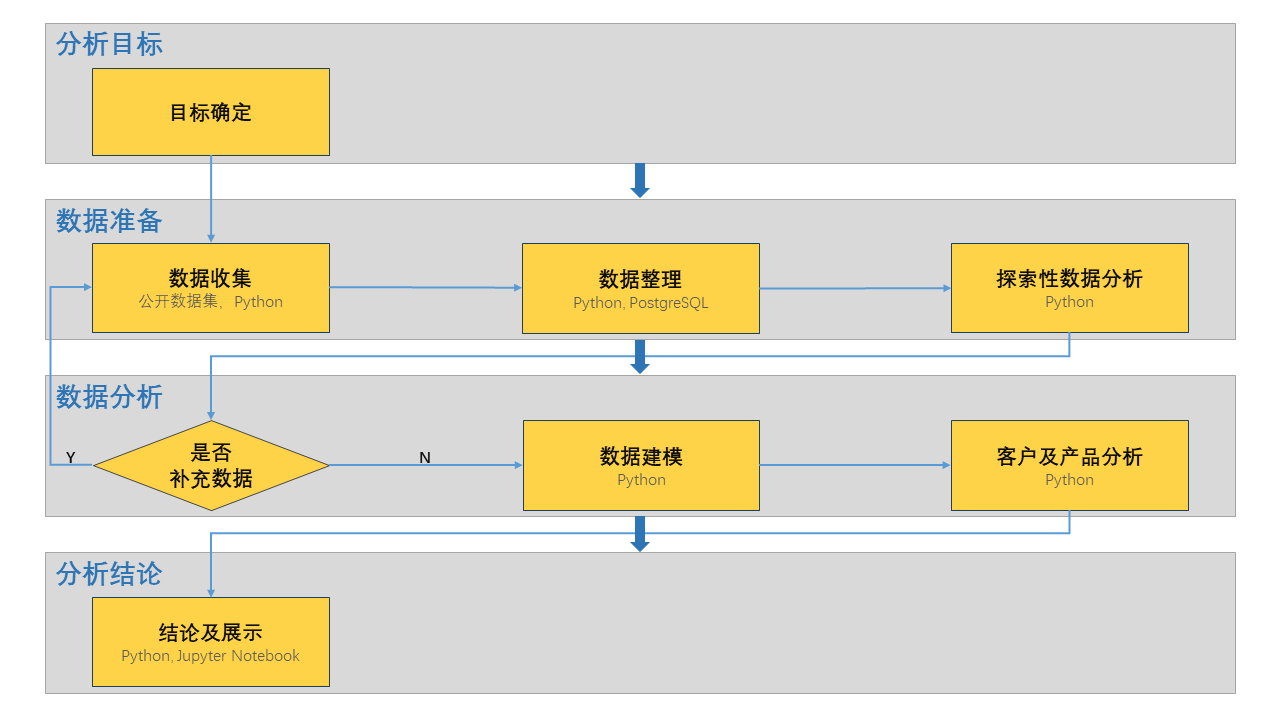

# 二、数据收集

本次分析使用的基础数据集来自[加州大学尔湾分校机器学习知识库](http://archive.ics.uci.edu/dataset/502/online+retail+ii)，在说明来源的情况下，该网站允许将该数据集用于任何用途。数据来源为一家英国礼品销售公司，主营业务为向批发商销售礼品及礼品类商品。数据集内容为该公司2009年12月1日至2011年12月9日之间的全部107万笔交易订单的基本信息。<br>

在收集数据进行基础整理后，我们将数据集保存至PostgreSQL数据库中，并在数据集中建立invoice_amount列，设置其为quantity和price的乘积。

In [1]:
import pandas as pd

In [2]:
file_info = pd.ExcelFile('basic_data.xlsx')

In [3]:
file_info.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [4]:
df = []
for sheet in file_info.sheet_names:
    df_excel = pd.read_excel('basic_data.xlsx', sheet_name = sheet)
    df.append(df_excel)

df = pd.concat(df, ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.to_csv('basic_data.csv', index = False, encoding = "utf-8")

# 三、数据整理

了解数据结构后，我们通过处理缺失值、数据类型转换、处理异常值和其他处理等步骤完成数据整理。

## （一）了解数据结构

对数据结构的了解表明：
1. 数据集共计有1,067,371条记录，包含订单编码，商品编码，商品描述，销售数量，订单日期，商品单价，客户编码和客户国别等信息；
2. 部分信息存在内容缺失，如description和customer_id，但大部分信息内容完整；
3. 部分信息重复内容较多，可以优化数据类型以节省内存或完善数据结构，如invoicedate，customerid和country；
4. 部分信息的特征表明存在特殊交易，需对这些交易的实质进行了解，确定是否需要从数据集中排除，如invoice，stockcode和quantity；
5. 部分信息命名规则不统一，应当修改以避免理解歧义，如customer_id和invoice_amount。

针对上述情况进行如下处理：
1. 对description和customer_id进行数据填充；
2. 对invoicedate，customerid和country进行数据类型转换，分别转换为datetime格式，int格式和category格式；
3. 对于特殊交易的总体原则为了解其实质在具体分析中按需求处理。这些特殊交易包括：
    1. invoice中特殊记录为字母A开头订单和字母C开头订单，分别对应手工调整坏账订单和取消订单。其中调整坏账订单应当被移除；
    2. stockcode中特殊记录为与客户购买行为无关的订单，这些记录应当被移除；
    3. description中的空白记录不对应实际销售，应当被移除；
    4. quantity为负的记录为取消订单和因各种原因无法完成的订单，在进一步分析中具体考虑；
    5. price为零的记录为因各种原因无法完成的订单，应当被移除；
    6. quantity和price中显著偏离其他数据的异常记录影响后续分析，应当被移除；
    7. customerid为空的记录是正常交易记录，在进一步分析中具体考虑。
4. 对customer_id和invoice_amount列重命名。

In [6]:
dfs = pd.read_csv('basic_data_from_postgresql.csv')

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   invoice         1067371 non-null  object 
 1   stockcode       1067371 non-null  object 
 2   description     1062989 non-null  object 
 3   quantity        1067371 non-null  int64  
 4   invoicedate     1067371 non-null  object 
 5   price           1067371 non-null  float64
 6   customer_id     824364 non-null   float64
 7   country         1067371 non-null  object 
 8   invoice_amount  1067371 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 73.3+ MB


In [8]:
dfs.nunique()

invoice           53628
stockcode          5305
description        5698
quantity           1057
invoicedate         604
price              2806
customer_id        5942
country              43
invoice_amount     8547
dtype: int64

In [9]:
dfs.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
0,500108,22028,PENNY FARTHING BIRTHDAY CARD,12,2010-03-04 00:00:00,0.42,15358.0,United Kingdom,5.04
1,500133,21260,FIRST AID TIN,12,2010-03-04 00:00:00,3.25,16329.0,United Kingdom,39.00
2,500149,15039,SANDALWOOD FAN,10,2010-03-04 00:00:00,0.85,17931.0,United Kingdom,8.50
3,500161,POST,POSTAGE,5,2010-03-05 00:00:00,18.00,12647.0,Germany,90.00
4,500232,20713,JUMBO BAG OWLS,200,2010-03-05 00:00:00,1.65,15769.0,United Kingdom,330.00


## （二）处理缺失值

In [10]:
dfs['customer_id'] = dfs['customer_id'].fillna(0)
dfs['customer_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1067371 entries, 0 to 1067370
Series name: customer_id
Non-Null Count    Dtype  
--------------    -----  
1067371 non-null  float64
dtypes: float64(1)
memory usage: 8.1 MB


In [11]:
dfs['description'] = dfs['description'].fillna('Empty')
dfs['description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1067371 entries, 0 to 1067370
Series name: description
Non-Null Count    Dtype 
--------------    ----- 
1067371 non-null  object
dtypes: object(1)
memory usage: 8.1+ MB


## （三）数据类型转换

In [12]:
dfs['invoicedate'] = dfs['invoicedate'].astype('datetime64[ns]')
dfs['invoicedate']

0         2010-03-04
1         2010-03-04
2         2010-03-04
3         2010-03-05
4         2010-03-05
             ...    
1067366   2010-03-04
1067367   2010-03-04
1067368   2010-03-04
1067369   2010-03-04
1067370   2010-03-04
Name: invoicedate, Length: 1067371, dtype: datetime64[ns]

In [13]:
dfs['customer_id'] = dfs['customer_id'].astype('int64')
dfs['customer_id']

0          15358
1          16329
2          17931
3          12647
4          15769
           ...  
1067366    15005
1067367    15005
1067368    15005
1067369    15005
1067370    15005
Name: customer_id, Length: 1067371, dtype: int64

In [14]:
dfs['country'] = dfs['country'].astype('category')
dfs['country']

0          United Kingdom
1          United Kingdom
2          United Kingdom
3                 Germany
4          United Kingdom
                ...      
1067366    United Kingdom
1067367    United Kingdom
1067368    United Kingdom
1067369    United Kingdom
1067370    United Kingdom
Name: country, Length: 1067371, dtype: category
Categories (43, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'United Arab Emirates', 'United Kingdom', 'Unspecified', 'West Indies']

## （四）处理异常值

**处理invoice列：**

In [15]:
#了解invoice列数据类型
df_extracted = dfs['invoice'].str.extractall('([A-Za-z0-9]+)')
unique_values = df_extracted[0].unique().tolist()
str_combined = ''.join(unique_values)
str_invoice_unique = ''.join(dict.fromkeys(str_combined))
str_invoice_unique

'5018349627CA'

In [16]:
#了解包含字母A的行
mask = dfs['invoice'].str.contains('A')
dfs_invioce_A = dfs[mask]
dfs_invioce_A

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
69791,A506401,B,Adjust bad debt,1,2010-04-29,-53594.36,0,United Kingdom,-53594.36
166072,A516228,B,Adjust bad debt,1,2010-07-19,-44031.79,0,United Kingdom,-44031.79
292849,A528059,B,Adjust bad debt,1,2010-10-20,-38925.87,0,United Kingdom,-38925.87
712909,A563185,B,Adjust bad debt,1,2011-08-12,11062.06,0,United Kingdom,11062.06
712910,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,0,United Kingdom,-11062.06
712911,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,0,United Kingdom,-11062.06


In [17]:
#了解包含字母C的行
mask = dfs['invoice'].str.contains('C')
dfs_invioce_C = dfs[mask]
dfs_invioce_C

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
30,C502438,S,SAMPLES,-1,2010-03-24,605.18,0,United Kingdom,-605.18
55,C502083,S,SAMPLES,-1,2010-03-22,170.37,0,United Kingdom,-170.37
91,C503983,POST,POSTAGE,-1,2010-04-09,6.41,17888,United Kingdom,-6.41
111,C505145,M,Manual,-1,2010-04-20,4217.59,16151,United Kingdom,-4217.59
119,C505490,M,Manual,-1,2010-04-22,5876.34,15849,United Kingdom,-5876.34
...,...,...,...,...,...,...,...,...,...
1066996,C500090,22385,JUMBO BAG SPACEBOY DESIGN,-1,2010-03-04,1.95,17763,United Kingdom,-1.95
1066997,C500090,75049L,LARGE CIRCULAR MIRROR MOBILE,-6,2010-03-04,1.25,17763,United Kingdom,-7.50
1066998,C500090,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,-2,2010-03-04,2.55,17763,United Kingdom,-5.10
1066999,C500090,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,-3,2010-03-04,2.95,17763,United Kingdom,-8.85


In [18]:
#了解仅包含数字的行
mask = dfs['invoice'].str.isnumeric()
df_invoice_numeric = dfs[mask]
df_invoice_numeric

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
0,500108,22028,PENNY FARTHING BIRTHDAY CARD,12,2010-03-04,0.42,15358,United Kingdom,5.04
1,500133,21260,FIRST AID TIN,12,2010-03-04,3.25,16329,United Kingdom,39.00
2,500149,15039,SANDALWOOD FAN,10,2010-03-04,0.85,17931,United Kingdom,8.50
3,500161,POST,POSTAGE,5,2010-03-05,18.00,12647,Germany,90.00
4,500232,20713,JUMBO BAG OWLS,200,2010-03-05,1.65,15769,United Kingdom,330.00
...,...,...,...,...,...,...,...,...,...
1067366,500094,85023A,CRYSTAL LARGE JEWELLED PHOTO FRAME,1,2010-03-04,2.55,15005,United Kingdom,2.55
1067367,500094,85025B,EAU DE NILE HEART SHAPE PHOTO FRAME,3,2010-03-04,1.65,15005,United Kingdom,4.95
1067368,500094,84791,GINGHAM HEART DECORATION,2,2010-03-04,2.95,15005,United Kingdom,5.90
1067369,500094,82494L,WOODEN FRAME ANTIQUE WHITE,2,2010-03-04,2.95,15005,United Kingdom,5.90


In [19]:
#了解仅包含数字的行
mask = df_invoice_numeric['quantity'] < 0
df_invoice_numeric[mask]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
6,500321,84016,ebay sales,-3300,2010-03-07,0.0,0,United Kingdom,0.0
12,500569,51012L,Empty,-45,2010-03-08,0.0,0,United Kingdom,0.0
15,500675,16156N,Empty,-200,2010-03-09,0.0,0,United Kingdom,0.0
20,519110,21082,Empty,-57,2010-08-13,0.0,0,United Kingdom,0.0
21,500913,72799A,Empty,-11,2010-03-11,0.0,0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
1066515,500005,84934,missing,-1782,2010-03-04,0.0,0,United Kingdom,0.0
1066516,500006,84741C,Empty,-113,2010-03-04,0.0,0,United Kingdom,0.0
1066585,509842,84803A,Empty,-29,2010-05-25,0.0,0,United Kingdom,0.0
1066717,509843,84675,Empty,-99,2010-05-25,0.0,0,United Kingdom,0.0


In [20]:
dfs = dfs[~dfs['invoice'].str.contains('A')]

**处理stockcode列：**

In [21]:
dfs[dfs['stockcode'].str.match('^[a-zA-Z]*$')]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
3,500161,POST,POSTAGE,5,2010-03-05,18.00,12647,Germany,90.00
7,500351,POST,POSTAGE,1,2010-03-07,24.75,0,United Kingdom,24.75
10,500535,POST,POSTAGE,2,2010-03-08,18.00,12472,Germany,36.00
14,500654,POST,POSTAGE,1,2010-03-09,145.00,12668,Germany,145.00
25,521952,POST,POSTAGE,2,2010-09-09,18.00,12683,France,36.00
...,...,...,...,...,...,...,...,...,...
1065505,499964,POST,POSTAGE,1,2010-03-03,35.00,12594,Italy,35.00
1066295,499982,POST,POSTAGE,2,2010-03-03,18.00,12681,France,36.00
1066985,C500081,M,Manual,-1,2010-03-04,102.84,13758,United Kingdom,-102.84
1067044,500091,DOT,DOTCOM POSTAGE,1,2010-03-04,286.02,0,United Kingdom,286.02


In [22]:
mask = dfs['stockcode'].str.match('^[a-zA-Z]*$')
dfs[mask]['description']

3                 POSTAGE
7                 POSTAGE
10                POSTAGE
14                POSTAGE
25                POSTAGE
                ...      
1065505           POSTAGE
1066295           POSTAGE
1066985            Manual
1067044    DOTCOM POSTAGE
1067327            Manual
Name: description, Length: 5471, dtype: object

In [23]:
drop_list = dfs[mask]['stockcode'].value_counts().index
drop_list

Index(['POST', 'DOT', 'M', 'D', 'S', 'ADJUST', 'AMAZONFEE', 'DCGSSGIRL',
       'DCGSSBOY', 'PADS', 'CRUK', 'm', 'DCGSLBOY', 'GIFT', 'DCGSLGIRL'],
      dtype='object')

In [24]:
dfs = dfs.drop(dfs[dfs['stockcode'].isin(drop_list)].index)

**处理description列：**

In [25]:
dfs[dfs['description'].apply(lambda x: len(x.split())) == 1].head(20)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
5,512450,84795D,Empty,5,2010-06-15,0.0,0,United Kingdom,0.0
11,500543,37502,Empty,129,2010-03-08,0.0,0,United Kingdom,0.0
12,500569,51012L,Empty,-45,2010-03-08,0.0,0,United Kingdom,0.0
15,500675,16156N,Empty,-200,2010-03-09,0.0,0,United Kingdom,0.0
19,500868,C2,CARRIAGE,1,2010-03-10,50.0,14156,EIRE,50.0
20,519110,21082,Empty,-57,2010-08-13,0.0,0,United Kingdom,0.0
21,500913,72799A,Empty,-11,2010-03-11,0.0,0,United Kingdom,0.0
24,501012,21623,Empty,36,2010-03-11,0.0,0,United Kingdom,0.0
28,501183,21255,Empty,44,2010-03-15,0.0,0,United Kingdom,0.0
33,501484,C2,CARRIAGE,1,2010-03-17,50.0,14911,EIRE,50.0


In [26]:
dfs[dfs['description'].apply(lambda x: len(x.split())) == 1]['description'].value_counts()

Empty              4368
CARRIAGE            279
check               162
SOMBRERO            130
?                    92
                   ... 
FOUND                 1
damaged/dirty         1
Damages/samples       1
?display?             1
damaged?              1
Name: description, Length: 93, dtype: int64

In [27]:
dfs[dfs['description'] == 'Empty']['price'].value_counts()

0.0    4368
Name: price, dtype: int64

In [28]:
dfs = dfs.drop(dfs[dfs['description'] == 'Empty'].index)

**处理quantity列：**

In [29]:
dfs['quantity'].value_counts().sort_index(ascending=False)

 80995    1
 74215    1
 19152    1
 12960    2
 12744    1
         ..
-9058     1
-9360     2
-9600     2
-74215    1
-80995    1
Name: quantity, Length: 927, dtype: int64

In [30]:
dfs[dfs['quantity'] < 0]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
6,500321,84016,ebay sales,-3300,2010-03-07,0.00,0,United Kingdom,0.00
141,C506532,21260,FIRST AID TIN,-2,2010-04-30,2.75,15538,United Kingdom,-5.50
236,C511526,71053,WHITE METAL LANTERN,-1,2010-06-08,3.75,18214,United Kingdom,-3.75
284,514017,21735,Damages,-143,2010-06-30,0.00,0,United Kingdom,0.00
298,C514340,22309,TEA COSY RED STRIPE,-2,2010-07-01,2.55,14527,United Kingdom,-5.10
...,...,...,...,...,...,...,...,...,...
1066996,C500090,22385,JUMBO BAG SPACEBOY DESIGN,-1,2010-03-04,1.95,17763,United Kingdom,-1.95
1066997,C500090,75049L,LARGE CIRCULAR MIRROR MOBILE,-6,2010-03-04,1.25,17763,United Kingdom,-7.50
1066998,C500090,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,-2,2010-03-04,2.55,17763,United Kingdom,-5.10
1066999,C500090,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,-3,2010-03-04,2.95,17763,United Kingdom,-8.85


In [31]:
dfs = dfs[(dfs['quantity'] < 20000) & (dfs['quantity'] > -20000)]

In [32]:
dfs.sort_values(by='quantity', ascending=False)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
1046506,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15,0.10,13902,Denmark,1915.2
17689,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17,0.10,13902,Denmark,1296.0
17687,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17,0.10,13902,Denmark,1296.0
17690,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17,0.10,13902,Denmark,1274.4
914466,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25,0.00,13256,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
638802,556687,23003,Printing smudges/thrown away,-9058,2011-06-14,0.00,0,United Kingdom,0.0
418528,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02,0.03,15838,United Kingdom,-280.8
396180,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02,0.03,15838,United Kingdom,-280.8
638803,556690,23005,printing smudges/thrown away,-9600,2011-06-14,0.00,0,United Kingdom,0.0


**处理invoicedate列：**

In [33]:
dfs['invoicedate'].describe(datetime_is_numeric = True)

count                          1057522
mean     2011-01-02 19:20:39.810803200
min                2009-12-01 00:00:00
25%                2010-07-11 00:00:00
50%                2010-12-07 00:00:00
75%                2011-07-24 00:00:00
max                2011-12-09 00:00:00
Name: invoicedate, dtype: object

In [34]:
dfs['invoicedate'].value_counts()

2010-12-06    7716
2010-12-01    6180
2010-12-07    5866
2010-12-09    5674
2010-12-05    5424
              ... 
2010-06-20     439
2009-12-05     400
2010-01-06     293
2010-12-22     289
2011-02-06     279
Name: invoicedate, Length: 604, dtype: int64

**处理price列：**

In [35]:
dfs['price'].value_counts()

1.25      104369
1.65       73794
0.85       69163
2.95       65828
0.42       45370
           ...  
25.62          1
2.35           1
165.84         1
3.15           1
84.26          1
Name: price, Length: 774, dtype: int64

In [36]:
dfs[dfs['price'] == 0]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
6,500321,84016,ebay sales,-3300,2010-03-07,0.0,0,United Kingdom,0.0
170,507649,21900,"KEY FOB , SHED",1,2010-05-10,0.0,0,United Kingdom,0.0
284,514017,21735,Damages,-143,2010-06-30,0.0,0,United Kingdom,0.0
324,515459,20852,given away,-1000,2010-07-12,0.0,0,United Kingdom,0.0
394,519373,21900,?,1520,2010-08-16,0.0,0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
1066979,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04,0.0,13047,United Kingdom,0.0
1067045,500091,22498,WOODEN REGATTA BUNTING,12,2010-03-04,0.0,0,United Kingdom,0.0
1067046,500091,22499,WOODEN UNION JACK BUNTING,12,2010-03-04,0.0,0,United Kingdom,0.0
1067047,500091,21243,PINK SPOTTY PLATE,8,2010-03-04,0.0,0,United Kingdom,0.0


In [37]:
dfs = dfs[dfs['price'] != 0]

In [38]:
dfs['price'].value_counts().sort_index(ascending=False)

18910.69      1
1157.15       1
1050.15       1
966.92        1
867.79        1
           ... 
0.07         22
0.06        165
0.05          5
0.04         67
0.03          5
Name: price, Length: 773, dtype: int64

In [39]:
dfs[dfs['price'] > 10000]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
210149,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27,18910.69,0,United Kingdom,-18910.69


In [40]:
dfs = dfs[dfs['stockcode'] != 'BANK CHARGES']

In [41]:
dfs.sort_values(by='price', ascending=False)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
82523,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-05-10,1157.15,0,United Kingdom,1157.15
26903,502451,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-03-24,867.79,0,United Kingdom,867.79
635955,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10,649.50,15098,United Kingdom,38970.00
635966,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10,649.50,15098,United Kingdom,649.50
71373,506571,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-04-30,408.40,0,United Kingdom,408.40
...,...,...,...,...,...,...,...,...,...
248217,524174,16053,POPART COL BALLPOINT PEN ASST,2000,2010-09-27,0.03,13687,United Kingdom,60.00
249103,C524235,16053,POPART COL BALLPOINT PEN ASST,-2000,2010-09-28,0.03,14277,France,-60.00
418528,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02,0.03,15838,United Kingdom,-280.80
396180,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02,0.03,15838,United Kingdom,-280.80


**处理customerid列：**

In [42]:
mask = dfs['customer_id'] == 0
dfs_customer_0 = dfs[mask]
dfs_customer_0

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
13,500575,85150,LADIES & GENTLEMEN METAL SIGN,2,2010-03-08,5.06,0,United Kingdom,10.12
17,500827,22218,CAKE STAND LACE WHITE,4,2010-03-10,8.47,0,United Kingdom,33.88
22,500918,21659,GLASS CAKE STAND,1,2010-03-11,29.74,0,United Kingdom,29.74
31,501306,47566,PARTY BUNTING,4,2010-03-15,8.47,0,United Kingdom,33.88
35,501558,20778,GARDEN PATH NOTEBOOK,6,2010-03-17,3.36,0,United Kingdom,20.16
...,...,...,...,...,...,...,...,...,...
1067245,500091,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2010-03-04,1.66,0,United Kingdom,1.66
1067246,500091,20972,PINK CREAM FELT CRAFT TRINKET BOX,5,2010-03-04,2.51,0,United Kingdom,12.55
1067247,500091,20985,HEART CALCULATOR,1,2010-03-04,2.51,0,United Kingdom,2.51
1067248,500091,21012,ANTIQUE ALL GLASS CANDLESTICK,26,2010-03-04,4.21,0,United Kingdom,109.46


In [43]:
dfs_customer_0['description'].value_counts().head(20)

JUMBO BAG RED RETROSPOT               689
JUMBO STORAGE BAG SUKI                633
REGENCY CAKESTAND 3 TIER              633
PARTY BUNTING                         620
WHITE HANGING HEART T-LIGHT HOLDER    598
RECYCLING BAG RETROSPOT               573
JUMBO SHOPPER VINTAGE RED PAISLEY     528
WOODLAND CHARLOTTE BAG                523
JUMBO BAG WOODLAND ANIMALS            509
RED TOADSTOOL LED NIGHT LIGHT         505
STRAWBERRY CERAMIC TRINKET BOX        505
SUKI  SHOULDER BAG                    488
CHARLOTTE BAG SUKI DESIGN             461
JUMBO  BAG BAROQUE BLACK WHITE        444
SMALL HEART MEASURING SPOONS          435
PACK OF 60 PINK PAISLEY CAKE CASES    434
LOVEBIRD HANGING DECORATION WHITE     432
NATURAL SLATE HEART CHALKBOARD        426
BATHROOM METAL SIGN                   424
GREEN REGENCY TEACUP AND SAUCER       423
Name: description, dtype: int64

**处理country列：**

In [44]:
dfs['country'].cat.categories

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Bermuda', 'Brazil',
       'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark',
       'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Korea', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Nigeria', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'USA', 'United Arab Emirates',
       'United Kingdom', 'Unspecified', 'West Indies'],
      dtype='object')

In [45]:
mask = dfs['country'] == 'Unspecified'
dfs_country_unknown = dfs[mask]
dfs_country_unknown

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_amount
40662,503713,21488,RED WHITE SCARF HOT WATER BOTTLE,4,2010-04-06,3.95,14265,Unspecified,15.80
40663,503713,22278,OVERNIGHT BAG VINTAGE ROSE PAISLEY,6,2010-04-06,4.95,14265,Unspecified,29.70
40664,503713,21843,RED RETROSPOT CAKE STAND,1,2010-04-06,10.95,14265,Unspecified,10.95
40665,503713,37503,TEA TIME CAKE STAND IN GIFT BOX,2,2010-04-06,10.75,14265,Unspecified,21.50
40666,503713,22423,REGENCY CAKESTAND 3 TIER,1,2010-04-06,12.75,14265,Unspecified,12.75
...,...,...,...,...,...,...,...,...,...
1027763,495919,22204,MILK PAN BLUE RETROSPOT,4,2010-01-27,3.75,16320,Unspecified,15.00
1027764,495919,22203,MILK PAN RED RETROSPOT,4,2010-01-27,3.75,16320,Unspecified,15.00
1027765,495919,22357,KINGS CHOICE BISCUIT TIN,4,2010-01-27,4.25,16320,Unspecified,17.00
1027766,495919,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-01-27,0.55,16320,Unspecified,13.20


In [46]:
dfs_country_unknown['customer_id'].value_counts()

16320    242
0        232
12743    134
14265     79
12363     23
12470     23
12351     21
Name: customer_id, dtype: int64

## （五）其他处理

In [47]:
dfs = dfs.rename(columns={'customer_id': 'customerid', 'invoice_amount': 'invoiceamount'})

In [48]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055615 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   invoice        1055615 non-null  object        
 1   stockcode      1055615 non-null  object        
 2   description    1055615 non-null  object        
 3   quantity       1055615 non-null  int64         
 4   invoicedate    1055615 non-null  datetime64[ns]
 5   price          1055615 non-null  float64       
 6   customerid     1055615 non-null  int64         
 7   country        1055615 non-null  category      
 8   invoiceamount  1055615 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 73.5+ MB


In [98]:
dfs.head()

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country,invoiceamount
0,500108,22028,PENNY FARTHING BIRTHDAY CARD,12,2010-03-04,0.42,15358,United Kingdom,5.04
1,500133,21260,FIRST AID TIN,12,2010-03-04,3.25,16329,United Kingdom,39.00
2,500149,15039,SANDALWOOD FAN,10,2010-03-04,0.85,17931,United Kingdom,8.50
4,500232,20713,JUMBO BAG OWLS,200,2010-03-05,1.65,15769,United Kingdom,330.00
8,500356,21903,MAN FLU METAL SIGN,2,2010-03-07,2.10,16984,United Kingdom,4.20


In [49]:
dfs.to_csv('data_processed.csv', index = False, encoding = "utf-8")

# 四、探索性数据分析

通过对信息进行描述性统计和可视化分析，并汇总前述已获取信息，我们得到对数据集体现的信息间关系的理解，由此确定具体分析方向和方法。

## （一）描述性统计和可视化分析

在对数据集按照订单进行汇总后，我们对以数字类型格式存储的信息（quantity，price和invoiceamount）进行描述性统计分析，程序包括了解数据特征，计算数据分布，数据集中度可视化和数据分布可视化。<br>

对quantity，price和invoiceamount进行描述性统计发现：
1. 各列数据均呈现明显的右偏分布，大部分数据集中在较小的范围内；
2. quantity中，单笔订单采购量集中于600件以内，单笔订单退货量集中于200件以内，且总体来看采购量明显大于退货量；
3. price中，单件商品价格总体较低，集中于5英镑以内；
4. invoiceamount中，单笔订单金额集中于1000英镑以内；
5. quantity和invoiceamount的总体变动趋势类似，均在每年年末出现高峰，其他期间总体变动保持平稳。

我们对其他主要信息（country）进行可视化分析，发现来自于英国本土的订单占总订单数90%以上，表明销售的国别集中度极高。

以上发现综合表明，公司销售商品以销往英国本土的低价商品为主，且单笔订单销售量较高，商品单价较低。

In [50]:
grouped = dfs.groupby('invoice').agg({
    'quantity': 'sum', 
    'invoiceamount': 'sum', 
    'invoicedate': 'first'
}).reset_index()

grouped['price'] = (grouped['invoiceamount'] / grouped['quantity']).round(2)

grouped.head()

,invoice,quantity,invoiceamount,invoicedate,price
0,489434,166,505.30,2009-12-01,3.04
1,489435,60,145.80,2009-12-01,2.43
2,489436,193,630.33,2009-12-01,3.27
3,489437,145,310.75,2009-12-01,2.14
4,489438,826,2286.24,2009-12-01,2.77


In [51]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(grouped[['quantity', 'price', 'invoiceamount']].describe())

       quantity    price  invoiceamount
count  46946.00 46946.00       46946.00
mean     232.63     3.25         413.22
std     1078.81    11.67        1100.21
min   -87167.00     0.03      -22998.40
25%       24.00     1.47          74.10
50%      117.00     2.05         242.30
75%      258.00     3.19         435.45
max    87167.00  1157.15       52940.94


In [52]:
ranges = {}

numerical_cols = ['quantity', 'price', 'invoiceamount']

for col in numerical_cols:
    Q1 = grouped[col].quantile(0.25)
    Q3 = grouped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, grouped[col].min())
    upper_bound = min(Q3 + 1.5 * IQR, grouped[col].max())
    ranges[col] = (lower_bound, upper_bound)

ranges

{'quantity': (-327.0, 609.0),
 'price': (0.03, 5.77),
 'invoiceamount': (-467.92500000000007, 977.4750000000001)}

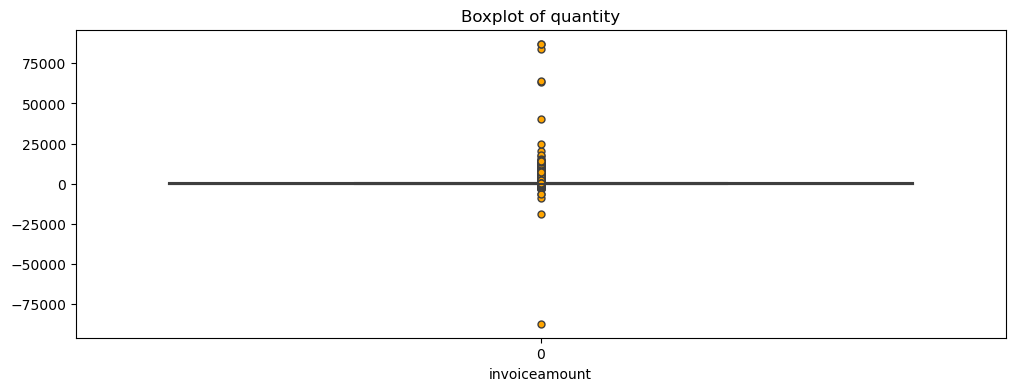

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(grouped['quantity'], flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title(f'Boxplot of quantity')
plt.xlabel(col)
plt.show()

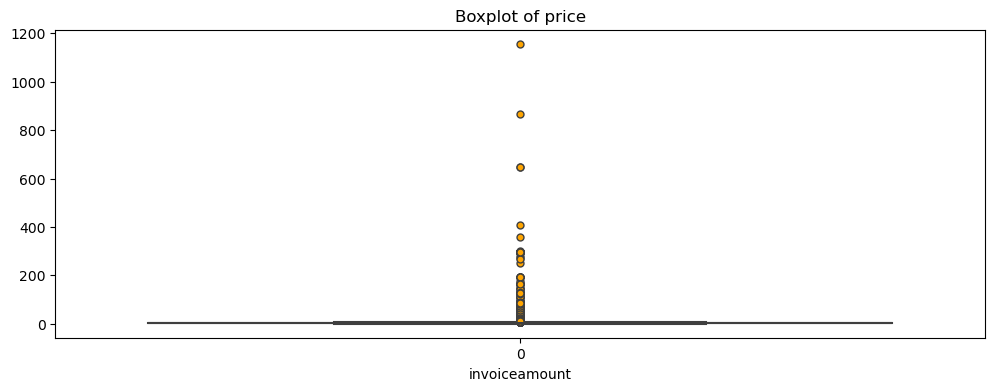

In [54]:
plt.figure(figsize=(12, 4))
sns.boxplot(grouped['price'], flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title(f'Boxplot of price')
plt.xlabel(col)
plt.show()

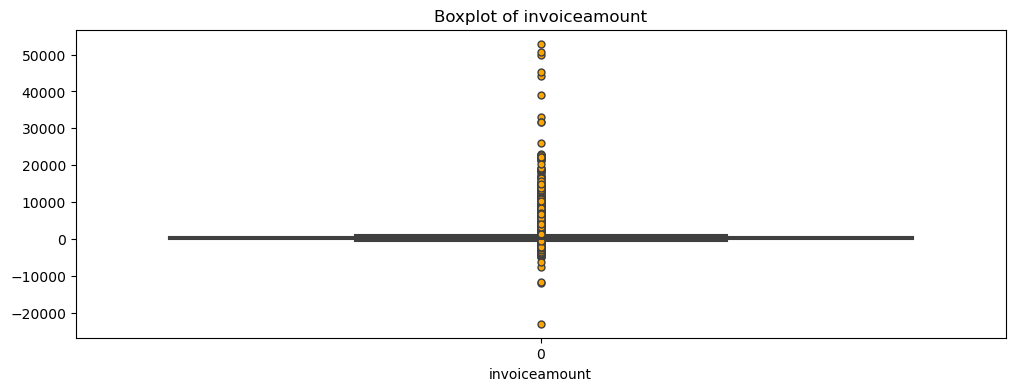

In [55]:
plt.figure(figsize=(12, 4))
sns.boxplot(grouped['invoiceamount'], flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title(f'Boxplot of invoiceamount')
plt.xlabel(col)
plt.show()

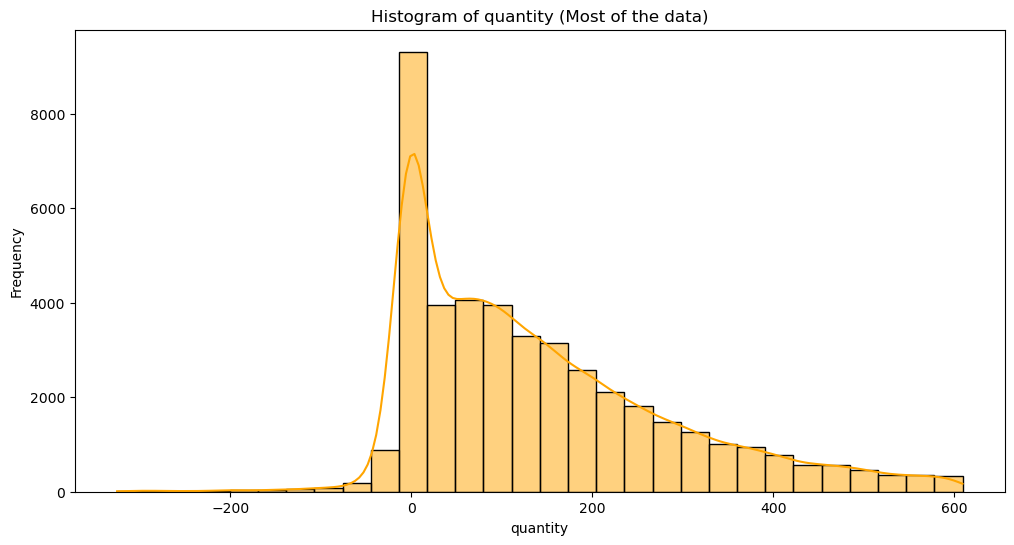

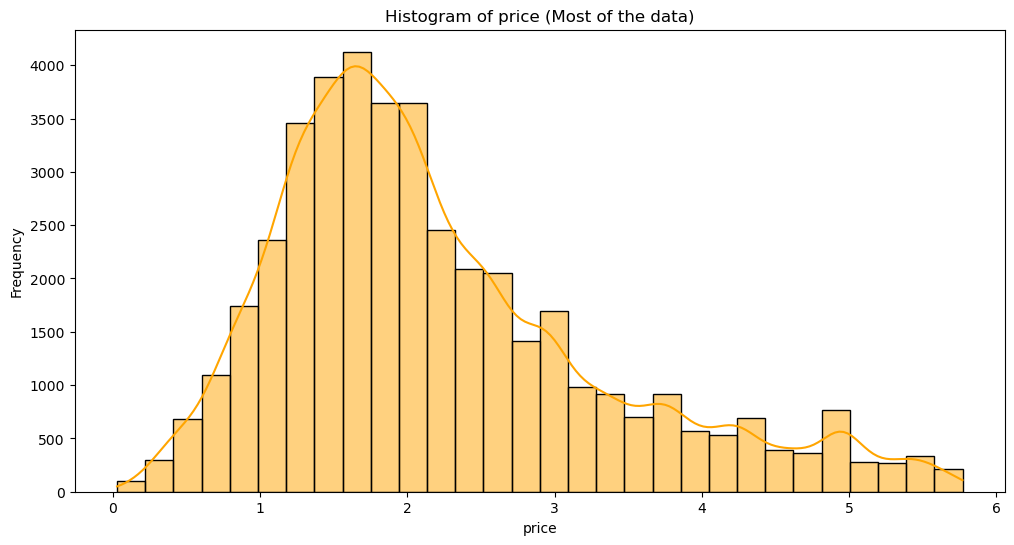

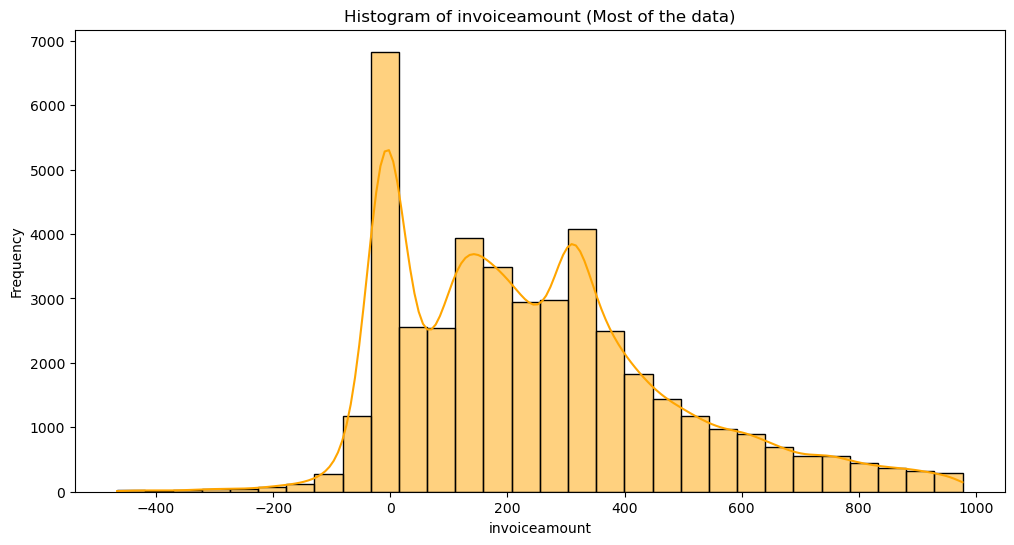

In [56]:
for col, (lower, upper) in ranges.items():
    plt.figure(figsize=(12, 6))
    sns.histplot(data=grouped[(grouped[col] >= lower) & (grouped[col] <= upper)], x=col, kde=True, bins=30, color='orange')
    plt.title(f'Histogram of {col} (Most of the data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

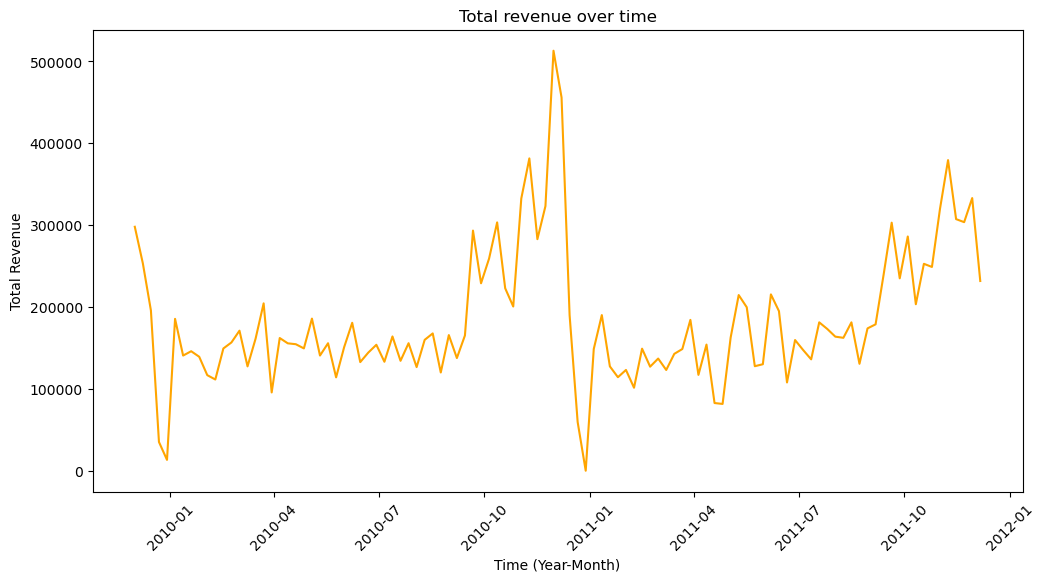

In [57]:
monthly_revenue_grouped = grouped.resample('7D', on='invoicedate')['invoiceamount'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue_grouped, color='orange')
plt.title('Total revenue over time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

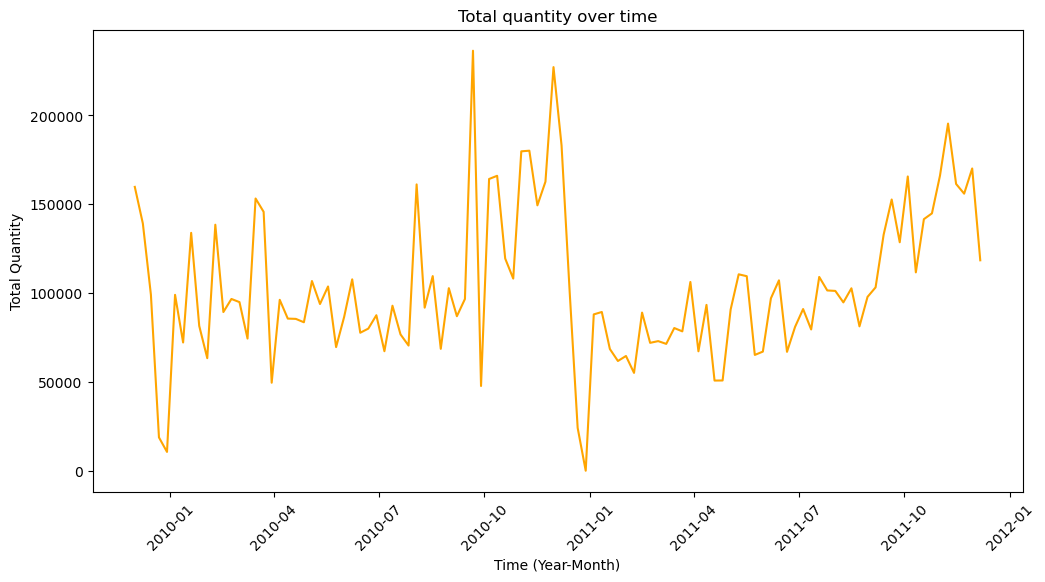

In [58]:
monthly_quantity_grouped = grouped.resample('7D', on='invoicedate')['quantity'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_quantity_grouped, color='orange')
plt.title('Total quantity over time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

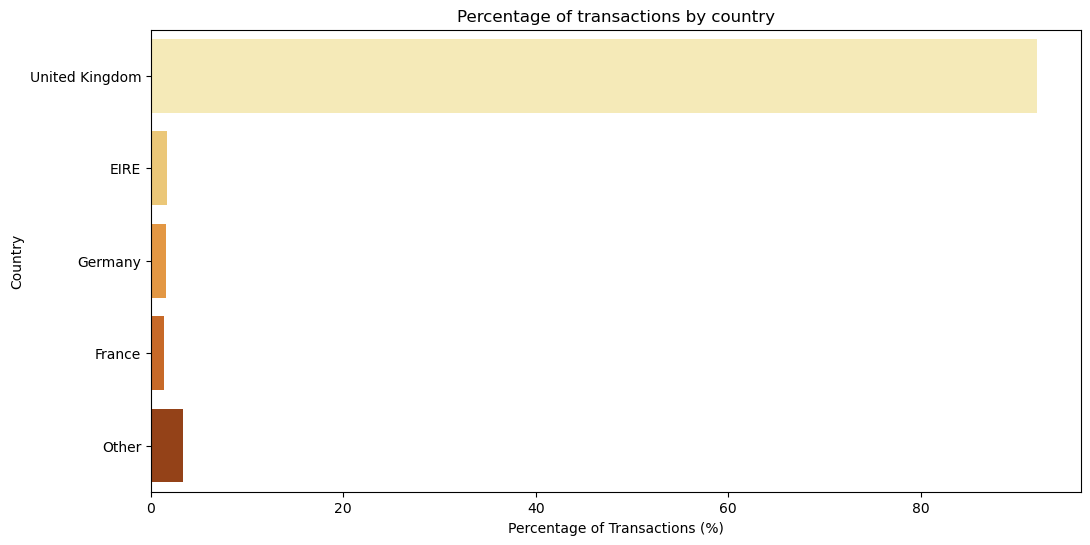

In [59]:
country_counts = dfs['country'].value_counts(normalize=True) * 100

top_countries_count = country_counts[:4]

other_countries_percentage = 100 - top_countries_count.sum()

top_countries_count['Other'] = other_countries_percentage

df_percentage = pd.DataFrame(top_countries_count)
df_percentage = df_percentage.reset_index()
df_percentage.columns = ['Country', 'Percentage of Transactions']

plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage of Transactions', y='Country', data=df_percentage, palette='YlOrBr')
plt.title('Percentage of transactions by country')
plt.xlabel('Percentage of Transactions (%)')
plt.ylabel('Country')
plt.show()

## （二）分析途径确定

公司客户主要为批发商，向他们提供商品服务的重点关注要素包括：
1. 合作关系。包括客户关系和服务质量；
2. 商品覆盖。包括品类丰富性和品种多样性；
3. 价格优势；
4. 供应稳定性。包括库存稳定和物流稳定；
5. 商品质量。

总体来看，这些要素要求我们分别从客户角度和商品角度出发，考虑如何提供更好商品服务。因而我们确定分析途径为客户分析和商品分析。<br>

已获取数据能够提供商品角度和客户角度信息。客户方面，已有数据体现客户的购买行为以及随时间推移客户的活跃程度。对于客户购买行为进行分类和追踪可以有针对性地维护客户关系；对于客户退货和降低购买频率等行为进行回访则有助于改善商品质量和服务质量。商品方面，已有数据体现商品的整体结构和销售趋势。对于商品整体结构进行分析可以了解商品覆盖和价格优势的程度；对于商品销售趋势进行分析则可以通过及时调整库存而提高供应稳定性。<br>

客户角度可能的分析方法包括将客户按照销售行为分组后进行精准营销的客户价值分析，和将客户按照加入日期后分组观察其后续留存率的客户流失预测；商品角度可能的分析方法包括对商品进行销售情况分析，和建立模型通过已有数据预测商品未来销售量的销售趋势预测。

## （三）数据补充

上述分析方法所需数据绝大部分由基础数据集提供，但销售趋势预测中对于季节性因素的考虑可能需要公共假期信息，因而通过Python收集2009年12月1日至2011年12月9日之间主要销售地区（英国，爱尔兰，法国，德国）的公共假期信息，由于该部分数据结构简单，收集后即保存至PostgreSQL数据库中。<br>

进一步分析中的销售趋势预测需要自基础数据结束后一年内的公共假期信息，同样使用Python收集并保存至PostgreSQL数据库中。

In [60]:
import holidays

date_range = pd.date_range(start='2009-11-03', end='2012-1-31')

df_holidays = pd.DataFrame(date_range, columns=['date'])

holiday_dict = {
    'uk': holidays.UnitedKingdom(),
    'ie': holidays.Ireland(),
    'fr': holidays.France(),
    'de': holidays.Germany()
}

for country_code, holiday_calendar in holiday_dict.items():
    df_holidays[country_code] = df_holidays['date'].apply(lambda x: x in holiday_calendar)

df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays.head(60)

,date,uk,ie,fr,de
0,2009-11-03,False,False,False,False
1,2009-11-04,False,False,False,False
2,2009-11-05,False,False,False,False
3,2009-11-06,False,False,False,False
4,2009-11-07,False,False,False,False
5,2009-11-08,False,False,False,False
6,2009-11-09,False,False,False,False
7,2009-11-10,False,False,False,False
8,2009-11-11,False,False,True,False
9,2009-11-12,False,False,False,False


In [61]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    820 non-null    datetime64[ns]
 1   uk      820 non-null    bool          
 2   ie      820 non-null    bool          
 3   fr      820 non-null    bool          
 4   de      820 non-null    bool          
dtypes: bool(4), datetime64[ns](1)
memory usage: 9.7 KB


In [62]:
df_holidays.to_csv("holidays.csv", index = False, encoding = "utf-8")

In [63]:
date_range_extended = pd.date_range(start='2011-11-1', end='2013-1-31')

df_holidays_extended = pd.DataFrame(date_range_extended, columns=['date'])

holiday_dict = {'uk': holidays.UnitedKingdom()}

for country_code, holiday_calendar in holiday_dict.items():
    df_holidays_extended[country_code] = df_holidays_extended['date'].apply(lambda x: x in holiday_calendar)

df_holidays_extended['date'] = pd.to_datetime(df_holidays_extended['date'])
df_holidays_extended.head(32)

,date,uk
0,2011-11-01,False
1,2011-11-02,False
2,2011-11-03,False
3,2011-11-04,False
4,2011-11-05,False
5,2011-11-06,False
6,2011-11-07,False
7,2011-11-08,False
8,2011-11-09,False
9,2011-11-10,False


In [64]:
df_holidays_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    458 non-null    datetime64[ns]
 1   uk      458 non-null    bool          
dtypes: bool(1), datetime64[ns](1)
memory usage: 4.2 KB


In [65]:
df_holidays_extended.to_csv("holidays_continued.csv", index = False, encoding = "utf-8")

# 五、数据建模

根据探索性数据分析的结果，需建立如下模型：
1. RFM模型（客户分析中的客户价值分析）<br>
RFM模型将每个客户按照R（客户最近一次购买日期与当前日期差值），F（总的购买次数），M（购买的总金额）三个维度分类以识别高价值客户，然后将R值、F值和M值的高低进行分段，并赋予分值，最后将RFM三个分数相加，得到每个客户的RFM总分。针对已有数据集，由于其中包含退货订单，因而我们将数据集分为正常交易和退货交易。正常交易按照前述维度将客户分类后赋分，识别不同类型客户；退货交易则按照高频退货，大额退货和近期退货的维度进行分类后赋分，识别不同类型客户。
2. Cohort模型（客户分析中的客户流失预测）<br>
Cohort模型将拥有类似特征的客户识别为一个群体，观察其随时间的变动情况。本次分析中，我们将每月新增客户识别为一个群体，然后按月度时间单位分析新增客户的后续购买情况，以在时间推移下了解客户的留存度，进而预测客户的流失。
3. SARIMAX模型（商品分析中的销售趋势预测）<br>
SARIMAX 模型的作用为根据数据的过去值（即自身的滞后和滞后的预测误差）“解释”给定的具有季节性和外生变量的时间序列。在本次分析中，我们通过模型拟合商品销售的时间序列。由于探索性数据分析阶段已表明商品销售可能存在季节性，并且商品销售可能和节假日相关，因而我们向模型添加季节性周期长度，选择节假日作为外生变量，选择最佳参数以拟合历史销售量，进而预测数据集结束后12个月内的销售量。

# 六、客户及商品分析

通过使用前述的模型分别从客户角度和商品角度对数据集进行分析，以为运营活动提供建议。<br>

在各项分析之前，我们均需考虑在数据处理阶段识别的异常交易，包括数量为负的记录和客户编码为空的记录。数量为负的记录产生于客户取消订单，包含客户价值和销售情况信息，因而在客户价值分析和销售情况分析中保留，客户流失预测和销售趋势预测中剔除。客户编码为空的记录为未记录客户编码的正常订单，因而在客户分析中剔除，商品分析中保留。

## （一）客户分析

### 1. 客户价值分析

客户价值分析可以为客户关系维护和服务质量提升提供依据。<br>

我们将所有记录分为正常交易和退货交易，正常交易中将R值、F值和M值分为4个分段，退货交易中将值分为2个分段。每个值中，最近购买和退货，购买和退货频率最高或者金额最多的客户的客户得最高分，最久未购买和退货，购买和退货频率最低或者金额最少的客户得最低分。得到三个分数综合考虑后，我们将客户分为不同的群体。<br>

在正常交易中，客户群体包括“最佳”客户（RFM均为4分），“潜力”客户（M分较高），“忠诚”客户（F分较高），“需要唤醒”客户（R分较低）等。分析结果表明，正常交易客户中“需要唤醒”客户占比较高，其次是“潜力”客户，而“最佳”客户和“忠诚”客户占比相对较低。“需要唤醒”客户占比较高可能和商品销售中存在的季节性有关，但也反映客户粘性总体较低。<br>

针对“最佳”客户，可以考虑向他们推荐更高附加值的产品，并优先提供服务；针对“潜力”客户，可以通过优惠活动或新产品推介激励他们更频繁地购买；针对“忠诚”客户，可以考虑向他们推广有针对性的产品，并提供个性化服务；针对“需要唤醒”客户，需要通过回访等途径了解客户离开原因，进而挽回这些客户，例如提高商品覆盖，提升服务质量等。针对客户粘性总体较低，公司可以利用客户资源和物流资源开拓新的业务线，提高业绩稳定性和资源利用率。<br>

在退货交易中，客户群体包括“关注”客户（RFM均为2分），“高频”客户（F分较高），“近期退货”客户（R分较高）等。分析结果表明，退货交易客户中，“高频”客户占比较高，其次是“近期退货”客户，“关注”客户占比最低。探索性数据分析阶段发现，退货订单占订单总体比例很低，但仍需通过向退货交易客户了解退货原因，以避免对物流资源的占用。<br>

针对“关注”客户，可以考虑向他们了解对产品和服务不满的原因，以改进产品和服务质量；针对"高频"客户，可以考虑向他们提供更有针对性的推荐，避免高频退货；针对“近期退货”客户，可以及时向他们了解退货原因并进行补偿，以避免客户流失。

In [66]:
import datetime as dt
import numpy as np

df_rfm = dfs[dfs['customerid'] != 0].copy()

df_rfm_return = df_rfm[df_rfm['quantity'] < 0]
df_rfm = df_rfm[df_rfm['quantity'] >= 0]

snapshot_date = df_rfm['invoicedate'].max() + dt.timedelta(days=1) 

df_rfm = df_rfm.groupby(['customerid']).agg({
    'invoicedate': lambda x: (snapshot_date - x.max()).days,
    'invoice': 'count',
    'invoiceamount': 'sum'
})
df_rfm = df_rfm.rename(columns={'invoicedate': 'Recency', 'invoice': 'Frequency', 'invoiceamount': 'Monetary'})
df_rfm.head()

,Recency,Frequency,Monetary
customerid,,,
12346,530,33,372.86
12347,3,253,5633.32
12348,76,46,1658.40
12349,19,172,3678.69
12350,311,16,294.40


In [67]:
snapshot_date_return = df_rfm_return['invoicedate'].max() + dt.timedelta(days=1) 

df_rfm_return = df_rfm_return.groupby(['customerid']).agg({
    'invoicedate': lambda x: (snapshot_date_return - x.max()).days,
    'invoice': 'count',
    'invoiceamount': 'sum'
})
df_rfm_return = df_rfm_return.rename(columns={'invoicedate': 'Recency', 'invoice': 'Frequency', 'invoiceamount': 'Monetary'})
df_rfm_return.head()

,Recency,Frequency,Monetary
customerid,,,
12346,432,1,-4.50
12349,736,5,-24.15
12352,263,7,-120.33
12359,8,10,-221.05
12362,12,8,-71.65


In [68]:
def rfm_level(df):
    if np.all(df[['R', 'F', 'M']] == 4):
        return 'Best Customers'
    elif (df['M'] == 3):
        return 'Big Spenders'
    elif (df['F'] == 3):
        return 'Royal Customers'
    elif (df['R'] <= 2) or (df['F'] <= 2) or (df['M'] <= 2):
        return 'Almost Lost'
    else:
        return 'Others'

r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
r_bins = pd.qcut(df_rfm['Recency'], q=4, labels = r_labels)
f_bins = pd.qcut(df_rfm['Frequency'], q=4, labels = f_labels)
m_bins = pd.qcut(df_rfm['Monetary'], q=4, labels = m_labels)

df_rfm = df_rfm.assign(R = r_bins.values, F = f_bins.values, M = m_bins.values)
df_rfm['RFM_Level'] = df_rfm.apply(rfm_level, axis=1)

df_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Level
customerid,,,,,,,
12346,530,33,372.86,1,2,2,Almost Lost
12347,3,253,5633.32,4,4,4,Best Customers
12348,76,46,1658.40,3,2,3,Big Spenders
12349,19,172,3678.69,4,4,4,Best Customers
12350,311,16,294.40,2,1,1,Almost Lost


In [69]:
def rfm_return_level(df):
    if np.all(df[['R', 'F', 'M']] == 2):
        return 'Focused Customers'
    elif (df['F'] == 2):
        return 'Frenquent Return'
    elif (df['R'] == 2):
        return 'Recent Return'
    else:
        return 'Others'

r_labels_return = range(2, 0, -1); f_labels_return = range(1, 3); m_labels_return = range(1, 3)
r_bins_return = pd.qcut(df_rfm_return['Recency'], q=2, labels = r_labels_return)
f_bins_return = pd.qcut(df_rfm_return['Frequency'], q=2, labels = f_labels_return)
m_bins_return = pd.qcut(df_rfm_return['Monetary'], q=2, labels = m_labels_return)

df_rfm_return = df_rfm_return.assign(R = r_bins_return.values, F = f_bins_return.values, M = m_bins_return.values)
df_rfm_return['RFM_Level'] = df_rfm_return.apply(rfm_return_level, axis=1)

df_rfm_return.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Level
customerid,,,,,,,
12346,432,1,-4.50,1,1,2,Others
12349,736,5,-24.15,1,2,2,Frenquent Return
12352,263,7,-120.33,1,2,1,Frenquent Return
12359,8,10,-221.05,2,2,1,Frenquent Return
12362,12,8,-71.65,2,2,1,Frenquent Return


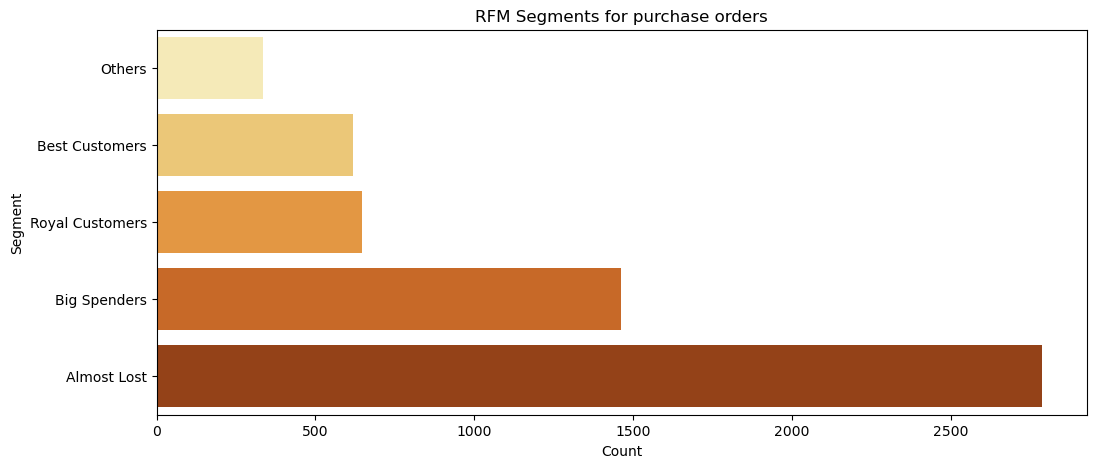

In [70]:
segments_counts = df_rfm['RFM_Level'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12,5))
sns.barplot(y=segments_counts.index, x=segments_counts.values, palette='YlOrBr')
plt.title('RFM Segments for purchase orders')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

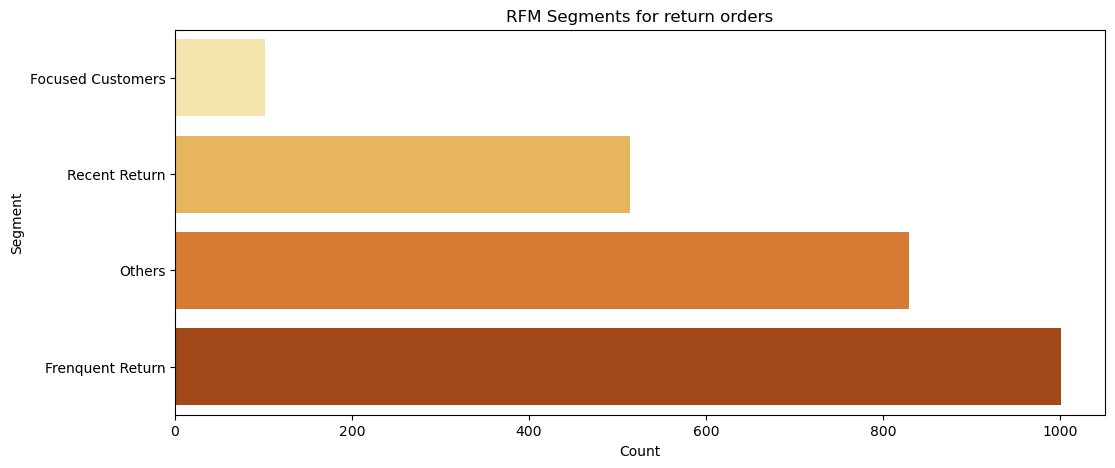

In [71]:
segments_counts_return = df_rfm_return['RFM_Level'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12,5))
sns.barplot(y=segments_counts_return.index, x=segments_counts_return.values, palette='YlOrBr')
plt.title('RFM Segments for return orders')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

### 2. 客户流失预测

客户流失预测可以用来预测“需要唤醒”客户的流失情况，有针对性地提高商品质量和服务质量。<br>

我们将客户按照加入的年份和月份进行分组，分别统计每组客户逐月的留存活跃客户数，并计算留存率。在得到留存率总体矩阵后，我们使用热图展示留存率的变化，其中颜色深浅表示留存率高低。分析结果表明，新客户通常在加入后第一年能保持相对较高的留存率，在接近年末时出现留存率的显著提高后，第二年的留存率会显著降低。并且，部分月份加入客户的总体留存率显著高于其他月份。同时，由于每年年末留存率均明显提高，表明商品销售可能存在季节性。<br>

针对上述发现，公司在进行营销活动时，应抓住新客户加入后的高留存率空间，争取将更多客户保持为“最佳”客户。并且，由于在接近年末时留存率有显著提高，这时应当进行针对性营销，将其他类型客户转化为“最佳”客户。图示还表明，部分新加入客户群的留存率显著高于其他时间加入的客户，公司应当对其原因进行分析，将成功经验用于营销活动中。

In [72]:
df_cohort = dfs[(dfs['customerid'] != 0) & dfs['quantity'] >= 0].copy()

def get_month(x): return dt.datetime(x.year, x.month, 1) 

df_cohort['InvoiceMonth'] = df_cohort['invoicedate'].apply(get_month) 

grouping = df_cohort.groupby('customerid')['InvoiceMonth'] 

df_cohort['CohortMonth'] = grouping.transform('min')

df_cohort.head()

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country,invoiceamount,InvoiceMonth,CohortMonth
0,500108,22028,PENNY FARTHING BIRTHDAY CARD,12,2010-03-04,0.42,15358,United Kingdom,5.04,2010-03-01,2009-12-01
1,500133,21260,FIRST AID TIN,12,2010-03-04,3.25,16329,United Kingdom,39.00,2010-03-01,2009-12-01
2,500149,15039,SANDALWOOD FAN,10,2010-03-04,0.85,17931,United Kingdom,8.50,2010-03-01,2010-02-01
4,500232,20713,JUMBO BAG OWLS,200,2010-03-05,1.65,15769,United Kingdom,330.00,2010-03-01,2009-12-01
8,500356,21903,MAN FLU METAL SIGN,2,2010-03-07,2.10,16984,United Kingdom,4.20,2010-03-01,2010-03-01


In [73]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date_int(df_cohort, 'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df_cohort, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df_cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['customerid'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customerid')
cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)
print(retention.round(4) * 100)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2009-12-01   100.0  37.04  34.36  42.99  39.16  39.06  39.06  35.99  34.17   
2010-01-01   100.0  23.61  32.50  32.50  30.00  31.67  28.89  24.44  30.83   
2010-02-01   100.0  29.36  22.71  30.47  25.48  21.05  21.88  28.25  27.15   
2010-03-01   100.0  22.17  26.65  24.06  23.35  20.52  24.76  30.90  29.72   
2010-04-01   100.0  23.34  19.86  16.03  18.82  23.00  27.87  26.83  11.50   
2010-05-01   100.0  19.22  17.65  19.61  18.82  25.88  21.96  12.94   6.27   
2010-06-01   100.0  21.84  19.92  21.07  23.75  28.74  13.41   9.58   8.43   
2010-07-01   100.0  20.65  20.11  28.80  29.89  15.22  11.41  14.67  14.13   
2010-08-01   100.0  23.75  30.62  32.50  17.50  13.12  10.00  14.38  14.38   
2010-09-01   100.0  29.24  26.27  14.83   8.90  10.17  14.41   9.75  12.71   
2010-10-01   100.0  30.32  16.22  13.03   9.04   9.04  13.56  14

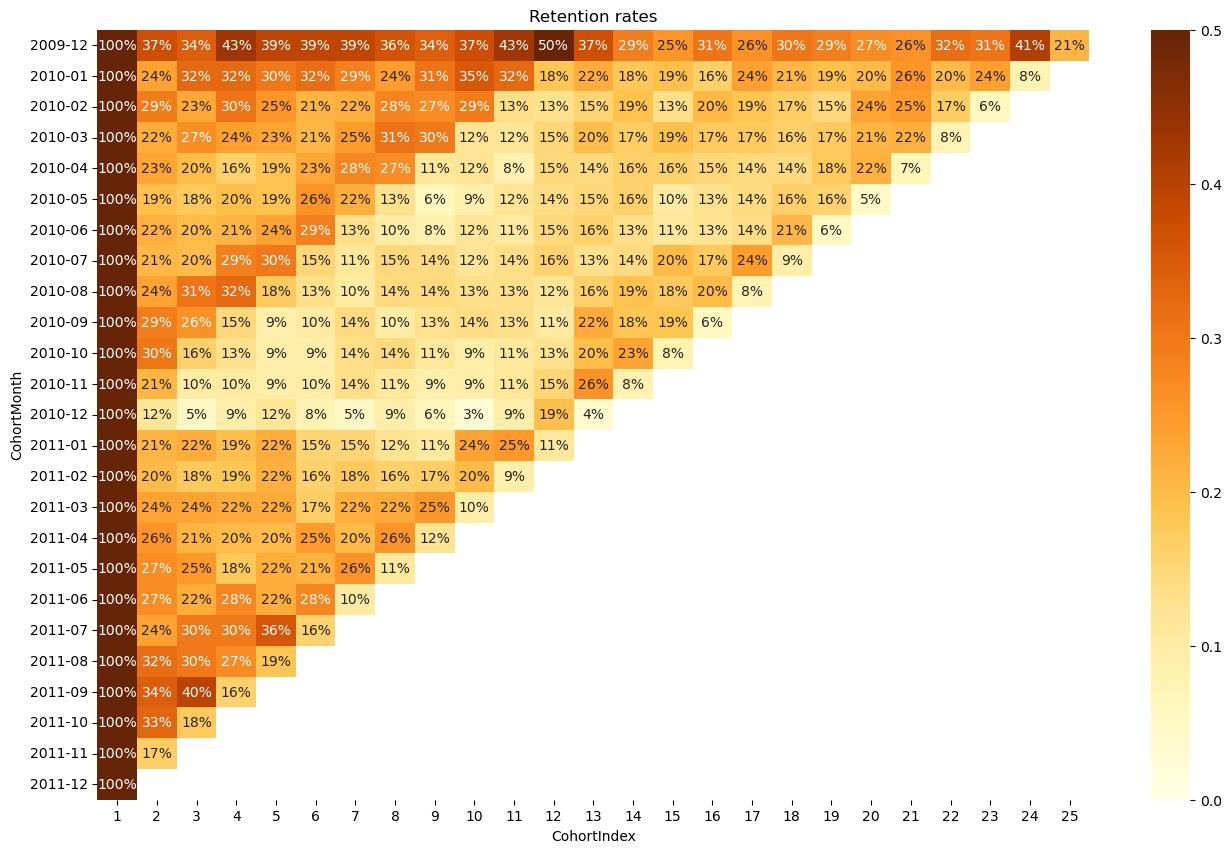

In [74]:
plt.figure(figsize=(16,10))
plt.title('Retention rates')

retention.index = pd.to_datetime(retention.index).strftime('%Y-%m')

sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='YlOrBr')
plt.show()

## （二）商品分析

### 1. 销售情况分析

销售情况分析主要是为了理解公司的销售组合，了解公司商品覆盖和价格优势的程度。<br>

对销售情况的分析发现：
1. 商品总品类数为4,917，销售额前十商品（“高收入商品”）占总销售额比例和销售量前十商品（“热销商品”）占总销售量比例均达到7%，表明商品销售品类集中度低，商品覆盖度广；
2. 高收入商品和热销商品重叠品类为4种，表明不同商品间单价差异较大；
3. 高收入商品和热销商品的销售趋势均全年保持大体稳定，并在年末迎来销售高峰；
4. 高收入商品之间销售额存在明显差异，但未形成差异化；
5. 热销商品之间销售量差异不显著；
6. 商品销售存在明显季节性，存在预测未来销售额的基础。

上述分析说明公司商品覆盖程度较高，价格优势强；但也表明公司发展受限于所处行业，商品开发尚有较大空间。公司可以通过开发高价值商品，淘汰低利润商品和调整定价策略提高收入及利润。鉴于商品销售存在明显的季节性，公司可以针对性调整库存管理和营销策略。例如在年末销售高峰期前通过销售预测调整库存，并在销售较慢的时期推出促销活动以提高库存周转。<br>

并且我们注意到，高收入商品之间销售额差异明显，因而为这些产品量身定制的营销策略可能会提高它们的销售，公司可以在营销活动中强调这些产品的独特价值和优势。而热销商品之间销售量差异不显著，表明这些商品属于基础款，客户对它们有相似的兴趣水平，可以通过关联推荐让客户关注到这些商品，进一步提高销量。

In [75]:
df_filtered = dfs.copy()

df_revenue = dfs.copy().groupby('stockcode')['invoiceamount'].sum()
df_revenue.describe()

count      4917.000000
mean       3945.316614
std       10659.116867
min        -126.000000
25%         233.670000
50%        1027.140000
75%        3361.250000
max      327813.650000
Name: invoiceamount, dtype: float64

In [76]:
top_revenue = df_revenue.nlargest(10)
top_revenue

stockcode
22423     327813.65
85123A    253720.02
85099B    181278.51
47566     147948.50
84879     131413.85
22086     121662.14
79321      84854.16
22197      80300.07
22386      76244.93
84347      73814.72
Name: invoiceamount, dtype: float64

In [77]:
(top_revenue.sum()/df_revenue.sum()).round(4) * 100

7.62

In [78]:
df_quantity = df_filtered.groupby('stockcode')['quantity'].sum()
df_quantity.describe()

count      4917.000000
mean       2221.067521
std        5581.895480
min         -27.000000
25%          97.000000
50%         565.000000
75%        2033.000000
max      108434.000000
Name: quantity, dtype: float64

In [79]:
top_quantity = df_quantity.nlargest(10)
top_quantity

stockcode
84077     108434
85099B     97132
21212      95450
85123A     92509
22197      89089
84879      81298
17003      70690
21977      56575
84991      54366
22492      45384
Name: quantity, dtype: int64

In [80]:
(top_quantity.sum()/df_quantity.sum()).round(4) * 100

7.24

In [81]:
common_labels = top_revenue.index.intersection(top_quantity.index)
len(common_labels)

4

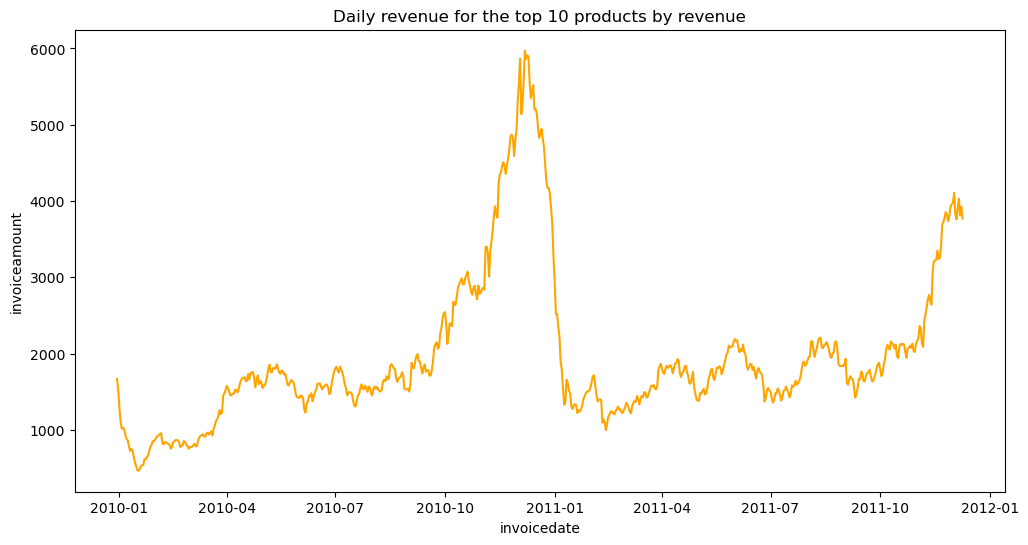

In [82]:
df_top_revenue = df_filtered[df_filtered['stockcode'].isin(top_revenue.index)]
df_top_quantity = df_filtered[df_filtered['stockcode'].isin(top_quantity.index)]

df_top_revenue = df_top_revenue.set_index('invoicedate')
df_top_quantity = df_top_quantity.set_index('invoicedate')

daily_revenue_top = df_top_revenue['invoiceamount'].resample('D').sum()
daily_quantity_top = df_top_quantity['quantity'].resample('D').sum()

plt.figure(figsize=(12, 6))
rolling_mean = daily_revenue_top.rolling(window=30).mean()

rolling_mean_reset = rolling_mean.reset_index()

sns.lineplot(x='invoicedate', y='invoiceamount', data=rolling_mean_reset, color='orange')

plt.title('Daily revenue for the top 10 products by revenue')
plt.show()

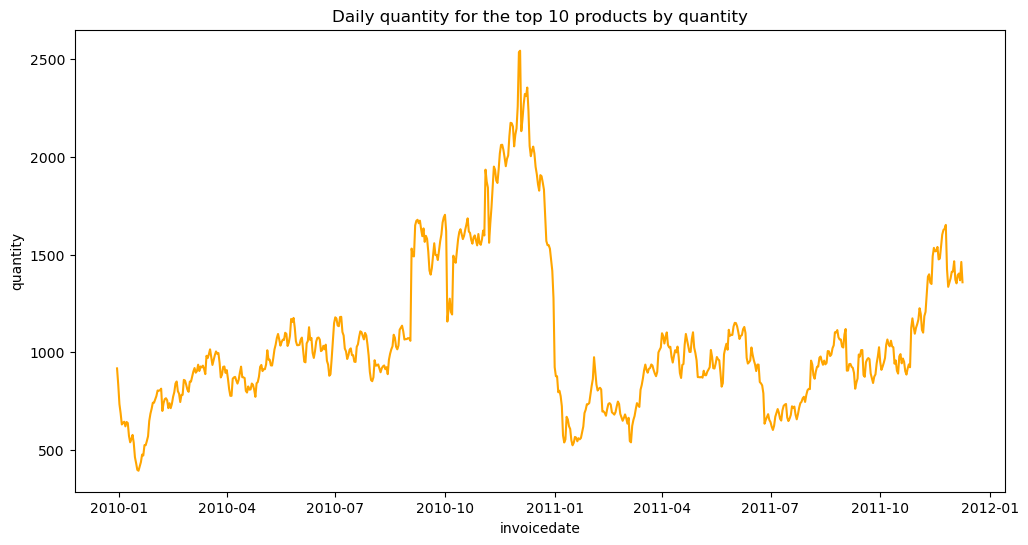

In [83]:
plt.figure(figsize=(12, 6))

rolling_mean = daily_quantity_top.rolling(window=30).mean()

rolling_mean_reset = rolling_mean.reset_index()

sns.lineplot(x='invoicedate', y='quantity', data=rolling_mean_reset, color='orange')

plt.title('Daily quantity for the top 10 products by quantity')
plt.show()

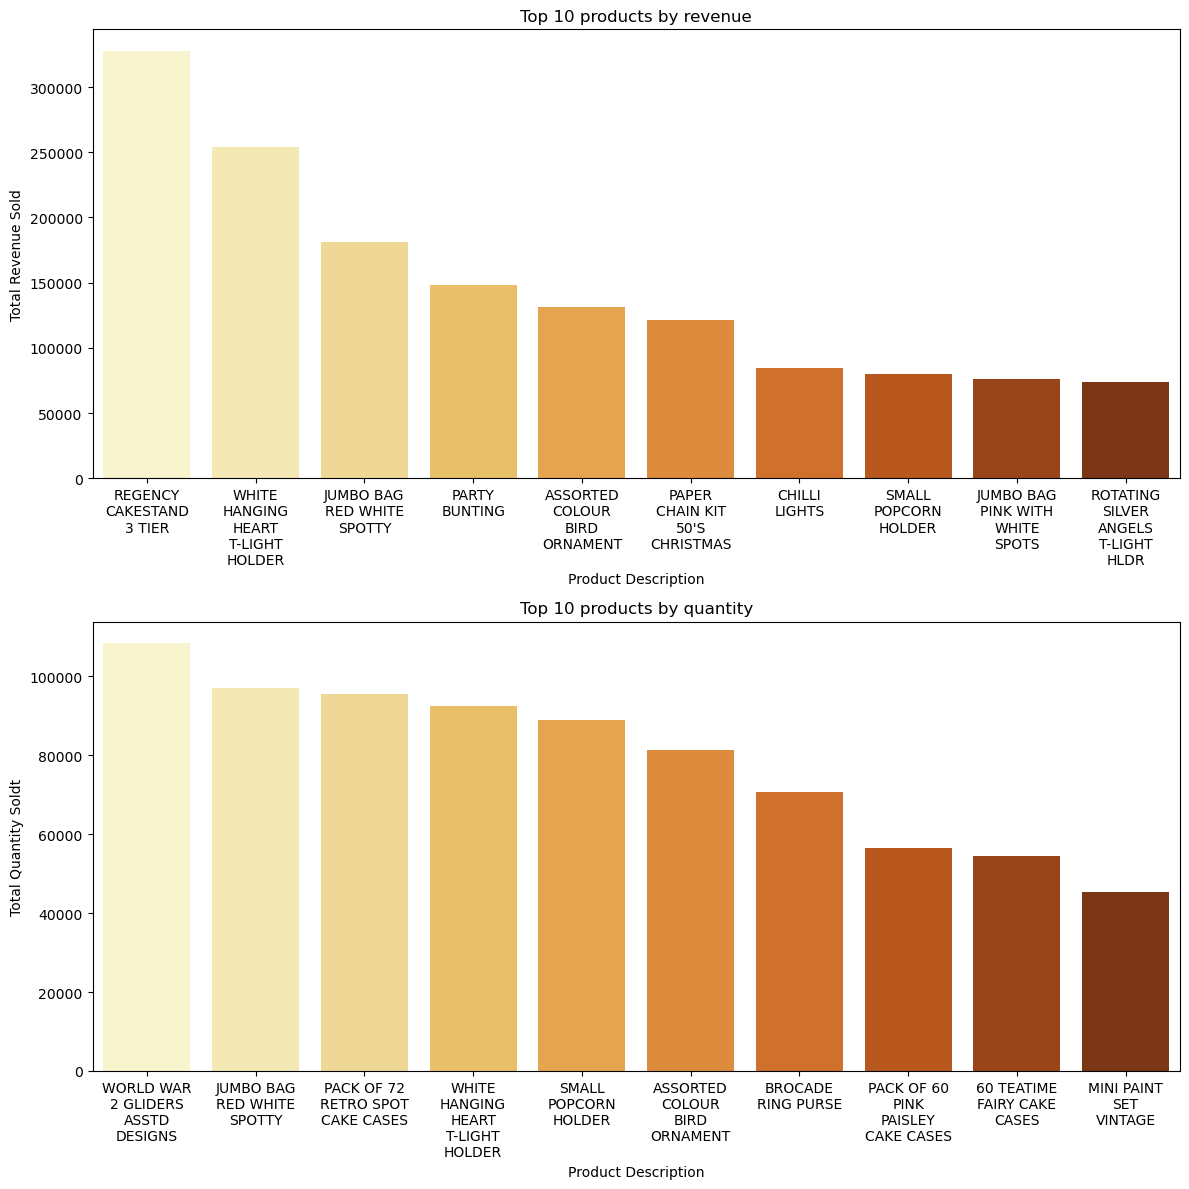

In [84]:
import textwrap

stockcode_to_description = df_filtered.set_index('stockcode')['description'].to_dict()

top_revenue_description = top_revenue.copy()
top_quantity_description = top_quantity.copy()

top_revenue_description.index = top_revenue_description.index.map(stockcode_to_description)
top_quantity_description.index = top_quantity_description.index.map(stockcode_to_description)

top_revenue_description.index = top_revenue_description.index.map(lambda x: '\n'.join(textwrap.wrap(str(x), width=10)))
top_quantity_description.index = top_quantity_description.index.map(lambda x: '\n'.join(textwrap.wrap(str(x), width=10)))

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(ax=axes[0], x=top_revenue_description.index, y=top_revenue_description.values, palette='YlOrBr')
axes[0].set_title('Top 10 products by revenue')
axes[0].set_xlabel('Product Description')
axes[0].set_ylabel('Total Revenue Sold')
axes[0].tick_params(axis='x')

sns.barplot(ax=axes[1], x=top_quantity_description.index, y=top_quantity_description.values, palette='YlOrBr')
axes[1].set_title('Top 10 products by quantity')
axes[1].set_xlabel('Product Description')
axes[1].set_ylabel('Total Quantity Soldt')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

### 2. 销售趋势预测

销售趋势预测使用已有销售数据通过模型预测未来销售数据，提高供应稳定性。考虑到前述对销售数据的分析表明销售趋势存在明显的季节性，并且公司销售商品为礼品及礼品类商品，销售趋势的变动可能和节假日存在关系，因而我们采用能够包含上述因素的SARIMAX模型进行分析和预测。为增强分析针对性，销售趋势预测选取了在英国本土销售量最大的商品，预测其在数据集结束后未来1年内在英国本土的销售量。<br>

我们首先确定模型的使用前提已经满足，然后将销售量最大商品的销售数据进行可视化，发现于每年年末销售量均出现明显峰值，且每年销售变动趋势总体类似，因而表明基础数据存在季节性周期，并将其长度确认为52周（1年）。构建模型过程中，我们首先将公共假期信息提前3周聚合至基础数据中，提前3周的原因为客户主要为需要较长周期备货的批发商，我们通过对比销售高峰和节假日的方式确定销售高峰通常在节假日前3周左右来临；我们将已有数据分为训练数据和测试数据，使用训练数据拟合最终使用的模型，并让模型对测试数据进行验证， 模型捕捉到销售高峰的到来，效果良好；我们使用模型进行未来销售情况预测，模型预测的销售量变动趋势符合预期。<br>

预测结果表明，模型成功根据可获取信息捕捉到销售情况的变化趋势及整体体现的季节性。通过对未来销售量的预测，公司可以在预测的高峰期增加备货，提前准备物流资源，以提高供应稳定性。

In [85]:
df_sarimax = dfs.copy()

df_sarimax = df_sarimax[df_sarimax['country'] == 'United Kingdom']
df_sarimax = df_sarimax[df_sarimax['quantity'] > 0]

max_product = df_sarimax.groupby('stockcode')['quantity'].sum().idxmax()

df_sarimax = df_sarimax[df_sarimax['stockcode'] == max_product]
df_sarimax.head()

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country,invoiceamount
2453,500108,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,240,2010-03-04,0.21,15358,United Kingdom,50.40
2583,500120,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-03-04,0.21,14135,United Kingdom,10.08
4087,500267,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-03-05,0.21,15978,United Kingdom,10.08
5373,500336,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-03-07,0.21,17589,United Kingdom,10.08
5688,500347,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-03-07,0.21,15631,United Kingdom,10.08


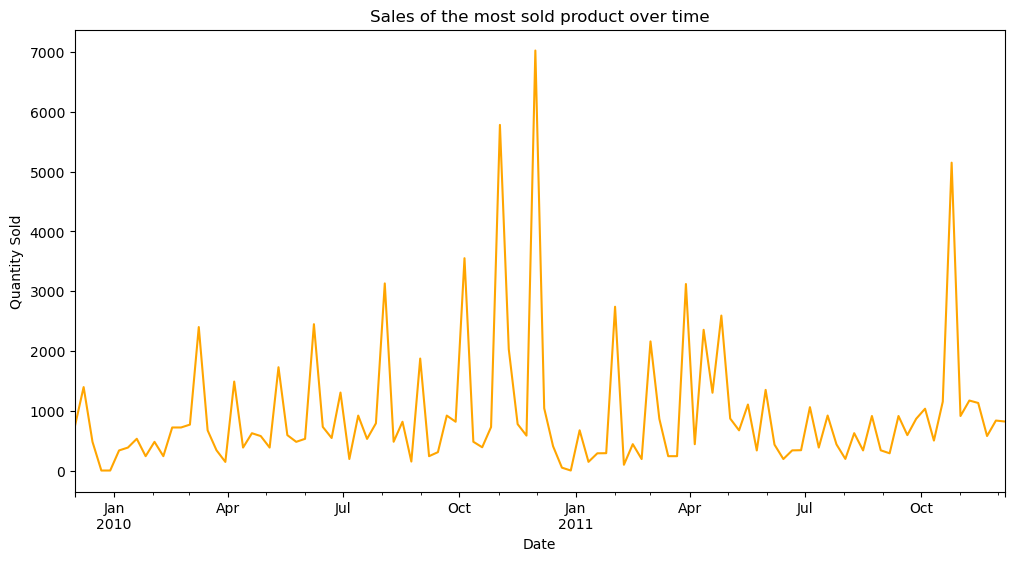

In [86]:
df_sarimax['invoicedate'] = pd.to_datetime(df_sarimax['invoicedate'])

df_sarimax = df_sarimax.groupby('invoicedate')['quantity'].sum().reset_index()
df_sarimax = df_sarimax.set_index('invoicedate')
df_sarimax = df_sarimax.resample('7D').sum()

plt.figure(figsize=(12, 6))
df_sarimax['quantity'].plot(color = 'orange')
plt.title('Sales of the most sold product over time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [87]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

check_stationarity(df_sarimax['quantity'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.513757
p-value                          0.007641
#Lags Used                       3.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


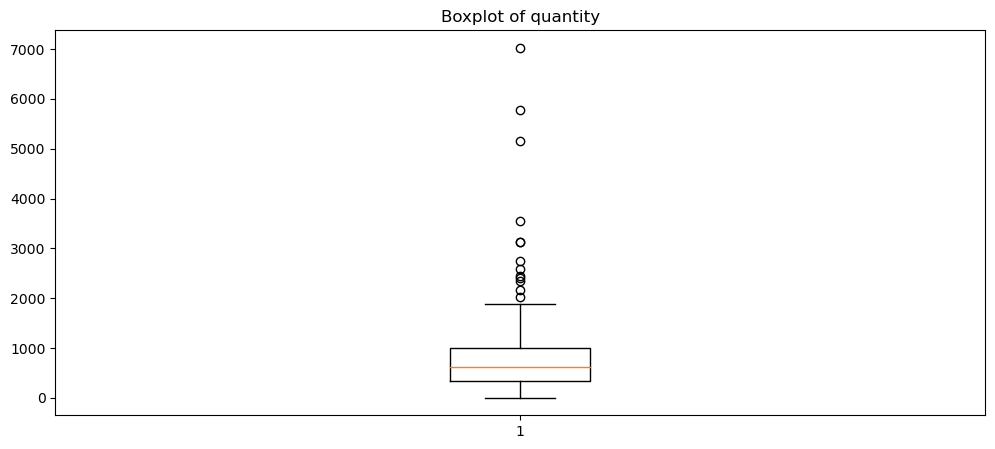

In [88]:
fig, ax = plt.subplots(figsize=(12,5))
ax.boxplot(df_sarimax['quantity'])
plt.title('Boxplot of quantity')
plt.show()

In [89]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

df_holidays = df_holidays.set_index('date')

holidays_weekly = df_holidays['uk'].resample('7D').sum()
holidays_weekly_shifted = holidays_weekly.shift(-3)

df_sarimax['uk'] = holidays_weekly_shifted.fillna(0)
df_sarimax.head()

,quantity,uk
invoicedate,,
2009-12-01,731,3.0
2009-12-08,1396,1.0
2009-12-15,480,0.0
2009-12-22,0,0.0
2009-12-29,0,0.0


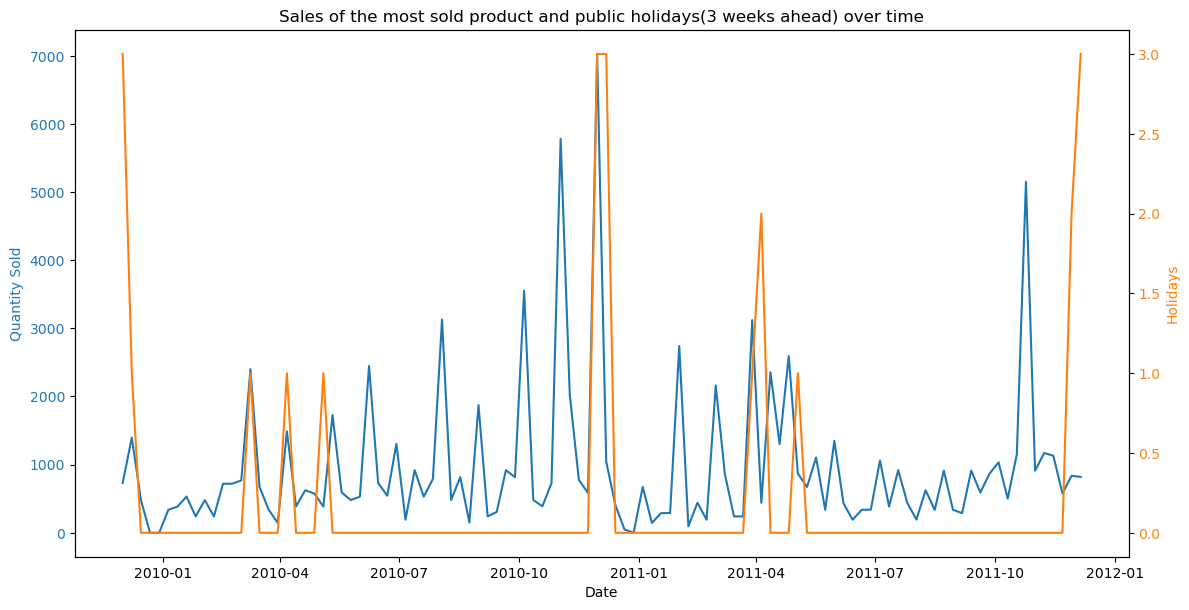

In [90]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Sold', color=color)
ax1.plot(df_sarimax.index, df_sarimax['quantity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Holidays', color=color)  
ax2.plot(df_sarimax.index, df_sarimax['uk'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Sales of the most sold product and public holidays(3 weeks ahead) over time')
plt.show()

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

train = df_sarimax.iloc[:-int(len(df_sarimax)*0.1)]
test = df_sarimax.iloc[-int(len(df_sarimax)*0.1):]

lowest_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train['quantity'], 
                            exog=train['uk'],
                            order=param, 
                            seasonal_order=param_seasonal, 
                            enforce_stationarity=False, 
                            enforce_invertibility=False)
            results = model.fit()
            
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

best_pdq, best_seasonal_pdq

((0, 0, 0), (0, 1, 1, 52))

In [92]:
model = SARIMAX(train['quantity'], 
                exog=train['uk'],
                order=best_pdq, 
                seasonal_order=best_seasonal_pdq, 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

pred = results.get_prediction(start=pd.to_datetime(test.index[0]), end=pd.to_datetime(test.index[-1]), dynamic=False, exog=test[['uk']])

y_forecasted = pred.predicted_mean
y_truth = test['quantity']
mse = mean_squared_error(y_truth, y_forecasted)
rmse = np.sqrt(mse)

rmse

2910.5554852386963

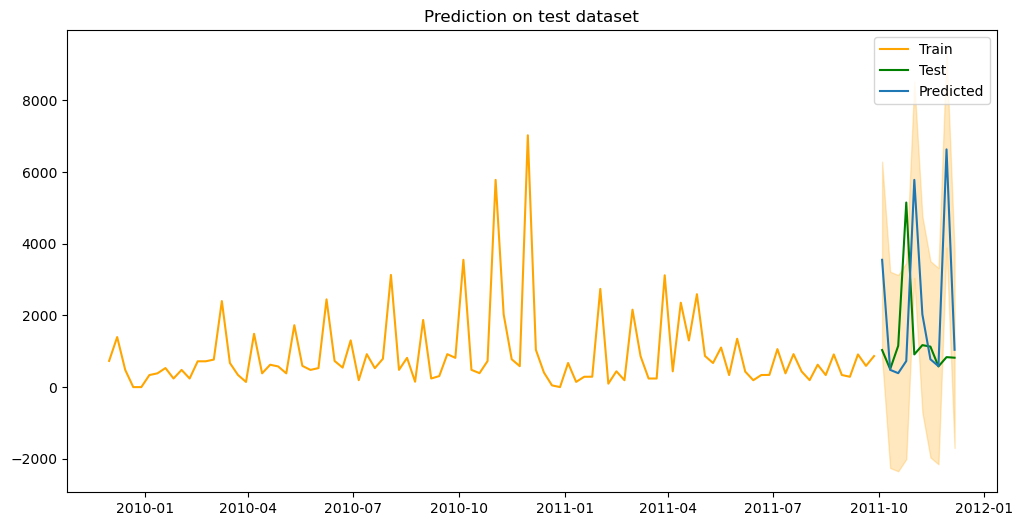

In [93]:
pred_conf = pred.conf_int()

plt.figure(figsize=(12,6))
plt.plot(train.index, train['quantity'], label='Train', color='orange')
plt.plot(test.index, test['quantity'], label='Test', color='green')
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicted')

plt.fill_between(pred_conf.index,
                 pred_conf.iloc[:, 0],
                 pred_conf.iloc[:, 1], color='orange', alpha=.25)

plt.legend()
plt.title('Prediction on test dataset')
plt.show()

In [94]:
df_holidays_extended['date'] = pd.to_datetime(df_holidays_extended['date'])

df_holidays_extended = df_holidays_extended.set_index('date')

df_holidays_extended_weekly = df_holidays_extended['uk'].resample('7D').sum()

df_holidays_extended_weekly_shifted = df_holidays_extended_weekly.shift(-3).fillna(0)

In [95]:
pred_future = results.get_prediction(
    start=pd.to_datetime(df_sarimax.index[-1]), 
    end='2012-12-31', dynamic=False, 
    exog=df_holidays_extended_weekly_shifted
)

pred_future.predicted_mean

2011-12-06    -139.285714
2011-12-13     407.000000
2011-12-20      48.000000
2011-12-27       0.000000
2012-01-03     673.000000
2012-01-10     145.000000
2012-01-17     288.000000
2012-01-24     290.000000
2012-01-31    2740.000000
2012-02-07      96.000000
2012-02-14     834.428571
2012-02-21     192.000000
2012-02-28    2160.000000
2012-03-06     864.000000
2012-03-13     633.428571
2012-03-20     240.000000
2012-03-27    2726.571429
2012-04-03    -346.857143
2012-04-10    2747.428571
2012-04-17    1694.428571
2012-04-24    2592.000000
2012-05-01     475.571429
2012-05-08     672.000000
2012-05-15    1104.000000
2012-05-22     336.000000
2012-05-29    1349.000000
2012-06-05     433.000000
2012-06-12     192.000000
2012-06-19     337.000000
2012-06-26     340.000000
2012-07-03    1060.000000
2012-07-10     384.000000
2012-07-17     920.000000
2012-07-24     437.000000
2012-07-31     194.000000
2012-08-07     625.000000
2012-08-14     336.000000
2012-08-21     912.000000
2012-08-28  

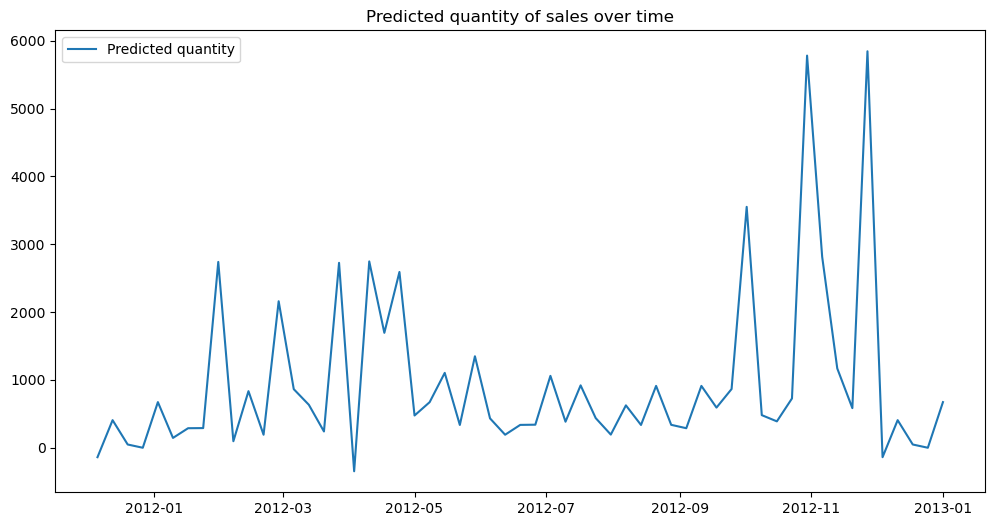

In [96]:
plt.figure(figsize=(12,6))
plt.plot(pred_future.predicted_mean.index, pred_future.predicted_mean, label='Predicted quantity')
plt.legend()
plt.title('Predicted quantity of sales over time')
plt.show()

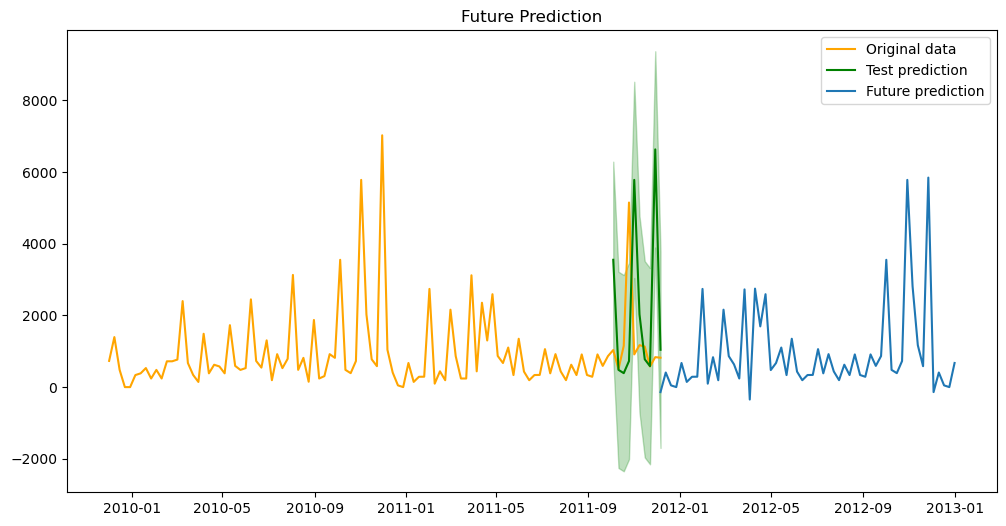

In [97]:
plt.figure(figsize=(12,6))
plt.plot(df_sarimax.index, df_sarimax['quantity'], label='Original data', color='orange')
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Test prediction', color='green')
plt.plot(pred_future.predicted_mean.index, pred_future.predicted_mean, label='Future prediction')

plt.fill_between(pred_conf.index,
                 pred_conf.iloc[:, 0],
                 pred_conf.iloc[:, 1], color='green', alpha=.25)

plt.legend()
plt.title('Future Prediction')
plt.show()

# 七、结论

受限于数据的可获取性，我们未能对于业务运营的其他方面进行分析；但针对已有数据的分析，我们获取如下主要发现：<br>
1. 在客户分析中，我们的主要发现为客户整体粘性不高，退货订单占总订单比例较低，但其中高频率退货客户较多，随时间推移客户留存率显著下降，且每年末后客户留存率会进一步下降，以及商品销售存在明显季节性；
2. 在商品分析中，我们发现商品覆盖程度较高，价格优势强，但商品开发程度较低，高收入商品的独特价值和优势未成功带来商品差异化，而热销商品之间也未形成商品矩阵，吸引客户购买。<br>

以上结果表明合作关系的提升空间较大，商品覆盖，供应稳定性和商品质量还有改进空间。针对上述问题，我们建议公司：
1. 合作关系方面，按照客户分层进行针对化营销和及时回访，提高客户粘性和服务质量；
2. 商品覆盖方面，提高高收入商品之间的差异化和营销力度，建立热销商品之间的商品矩阵，提高单笔订单的销售额；
3. 价格优势方面，在保持价格优势的基础上逐步提升商品结构；
4. 供应稳定性方面，通过不断更新销售预测模型进行更精准的库存管理，提高物流资源的使用效率；
5. 商品质量方面，按照客户层次的结果向低满意度客户（如“需要唤醒”客户和“关注”客户）及时回访。